# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re
import os

from ydata_profiling import ProfileReport
import sweetviz as sv

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Carregando e inspecionando dados do .csv para o DATAFRAME

In [2]:
main_df = pd.read_csv(
  "./data/card_transdata.csv", 
  na_values=[' ', '_', '_______'], # substituindo com NaN os valores ao o dataset demonstrados ao lado
  low_memory=False #
)

# Mostrando as 5 primeiras linhas do DATAFRAME ORIGINAL

In [3]:
main_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Mostrando o formato do DATAFRAME ORIGINAL


In [4]:
# número de colunas
print(f'columns: {main_df.shape[1]}')

# número de linhas
print(f'rows: {main_df.shape[0]}')

columns: 8
rows: 1000000


# Obtendo informações sobre cada variável do DATAFRAME ORIGINAL

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# Limpeza de dados do DATAFRAME ORIGINAL

### 1. Valores ausentes

In [6]:
# Verificando a soma dos valores ausentes para cada coluna
main_df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### 2. Valores duplicados

In [7]:
# Verificando a soma das linhas duplicadas
print(f'duplicate rows: {main_df.duplicated().sum()}')

duplicate rows: 0


# Algumas informações estatísticas do DATAFRAME ORIGINAL

In [8]:
# Criando uma tabela de estatísticas descritivas para dados
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


# Análise Exploratória dos Dados (EDA) do DATAFRAME ORIGINAL

## Recursos Numéricos

### Distribuição das Distâncias de Casa

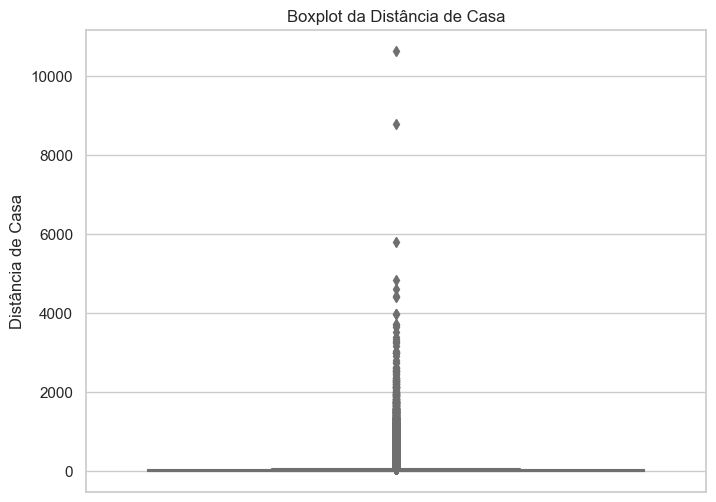

In [9]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=main_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

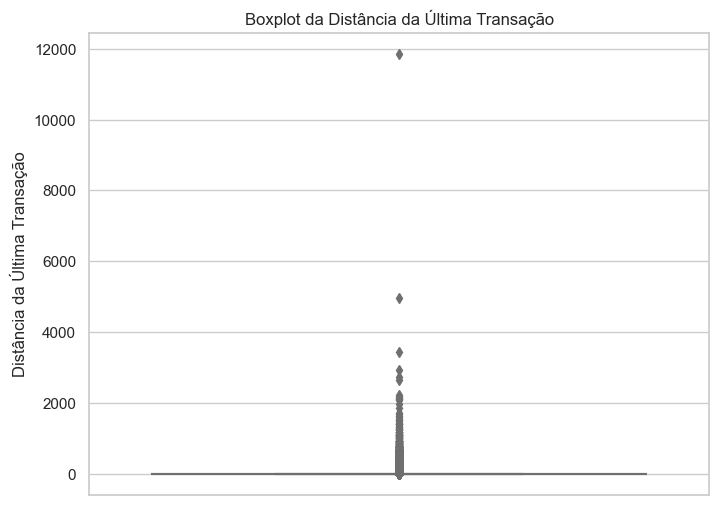

In [10]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=main_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

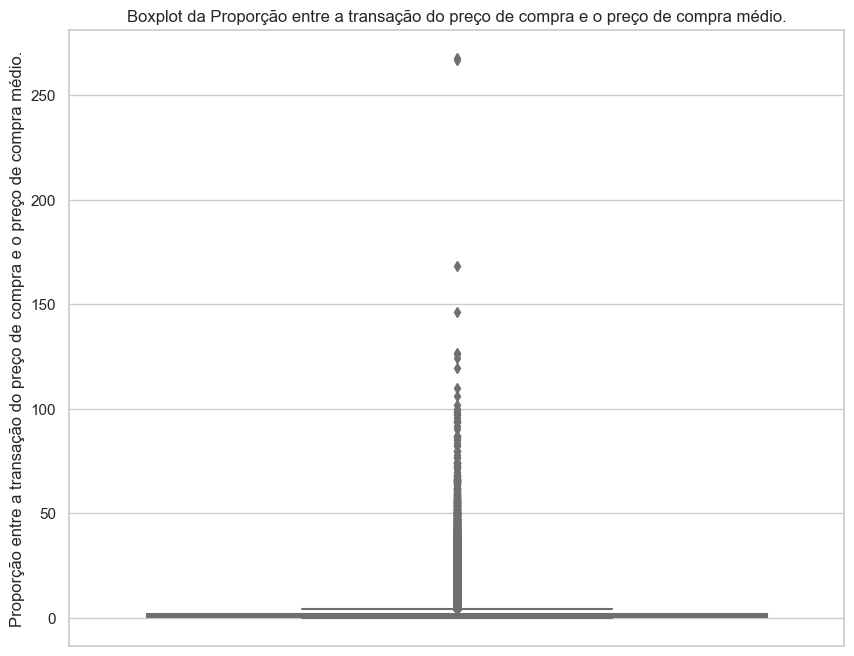

In [11]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=main_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

In [12]:
# Criando uma lista contendo os recursos numéricos
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

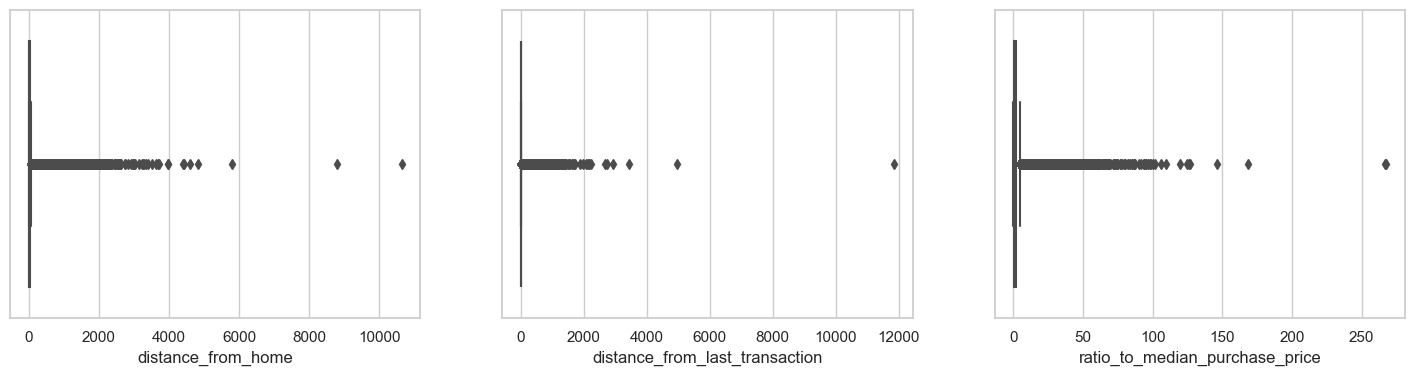

In [13]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica para detectar os outliers
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=main_df, x=col)
plt.show()

## Recursos Categóricos

### Distribuição de Compras em Lojas Repetidas

In [14]:
# Contando os valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = main_df['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64

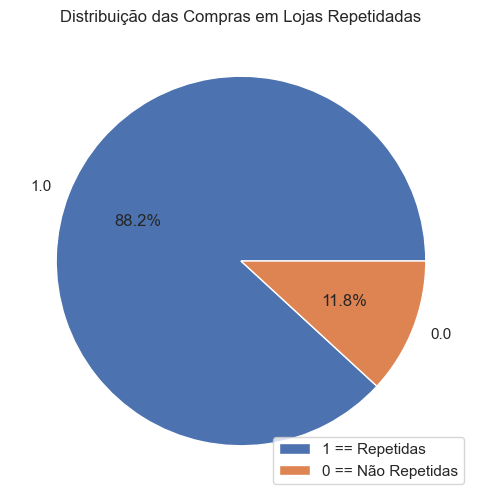

In [15]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [16]:
# Contando os valores únicos na coluna 'used_chip'
used_chip_count = main_df['used_chip'].value_counts()
used_chip_count

used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64

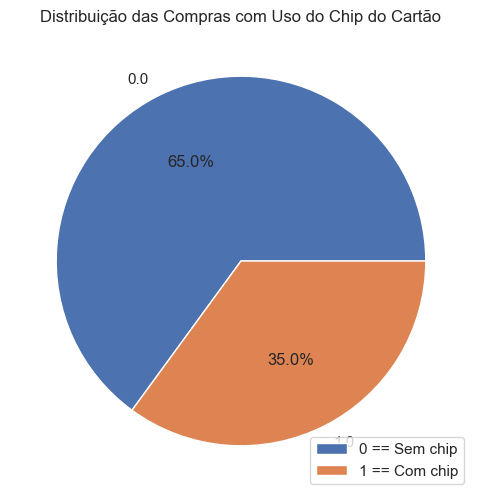

In [18]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [19]:
# Contando os valores únicos na coluna 'used_pin_number'
used_pin_number_count = main_df['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    899392
1.0    100608
Name: count, dtype: int64

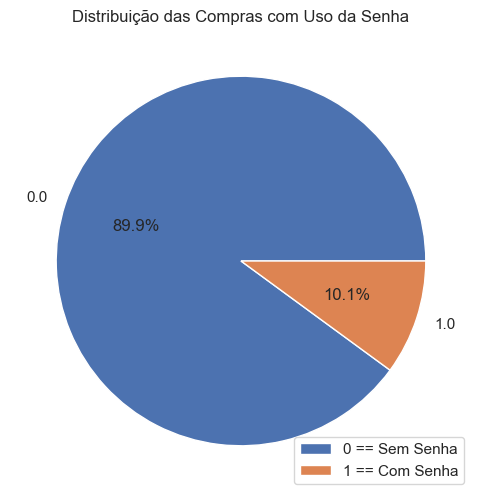

In [20]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [21]:
# Contando os valores únicos na coluna 'online_order'
online_order_count = main_df['online_order'].value_counts()
online_order_count

online_order
1.0    650552
0.0    349448
Name: count, dtype: int64

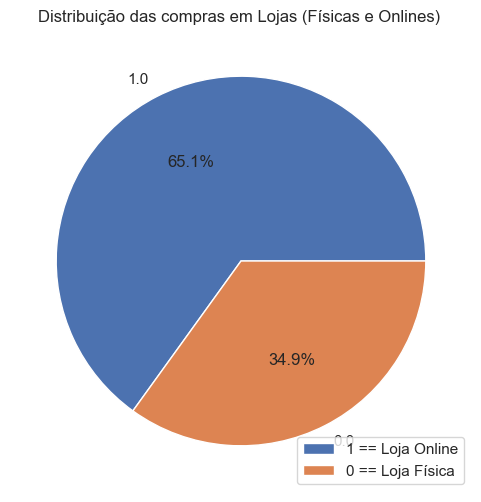

In [23]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

In [24]:
# Criando uma lista contendo os recursos categóricos
category_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

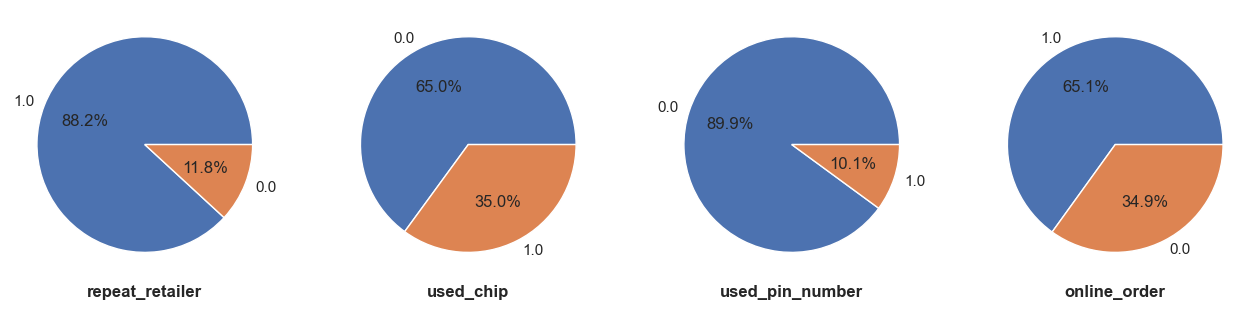

In [25]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize=(16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = main_df[col].value_counts().values, 
            labels=main_df[col].value_counts().index, 
            autopct='%1.1f%%')
    plt.xlabel(col, weight='bold')
plt.show()

# Excluindo os valores que NÃO são FRAUDES

## Copiando o DATAFRAME ORIGINAL e atribuindo a uma variável DATAFRAME DE FRAUDE, excluindo valores que NÃO são FRAUDES e depois excluindo a coluna de "fraud" do DATAFRAME DE FRAUDE

In [26]:
# Removendo todas as linhas onde 'fraud' é igual a 0
fraud_df = main_df[main_df['fraud'] != 0]

# Redefinindo o índice do DataFrame
fraud_df.reset_index(drop=True, inplace=True)

# Removendo a coluna 'fraud'
fraud_df = fraud_df.drop('fraud', axis=1) 

# Apresentando o DATAFRAME DE FRAUDE 

In [28]:
fraud_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0
87401,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0


# Mostra as 5 primeiras linhas do DATAFRAME DE FRAUDE

In [29]:
fraud_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0


# Mostrando o formato do DATAFRAME DE FRAUDE

In [31]:
# número de colunas
print(f'columns: {fraud_df.shape[1]}')

# número de linhas
print(f'rows: {fraud_df.shape[0]}')

columns: 7
rows: 87403


# Algumas informações estatísticas do DATAFRAME DE FRAUDE

In [32]:
# Criando uma tabela de estatísticas descritivas para dados
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000


# Análise Exploratória dos Dados (EDA) do DATAFRAME DE FRAUDE

## Recursos Numéricos

### Distribuição das Distâncias de Casa

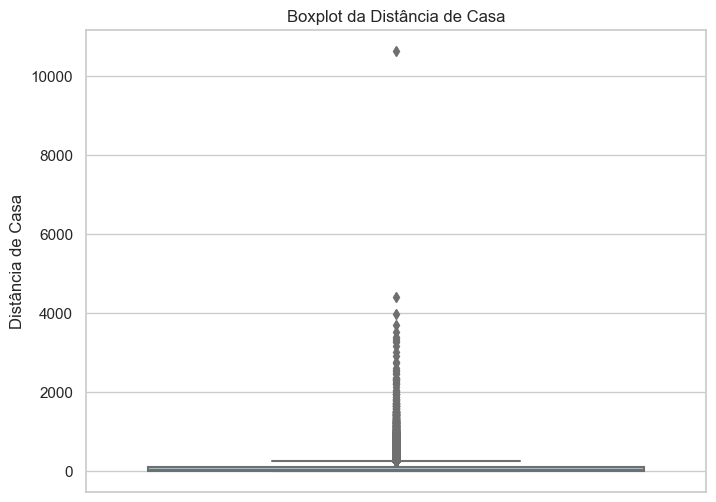

In [33]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

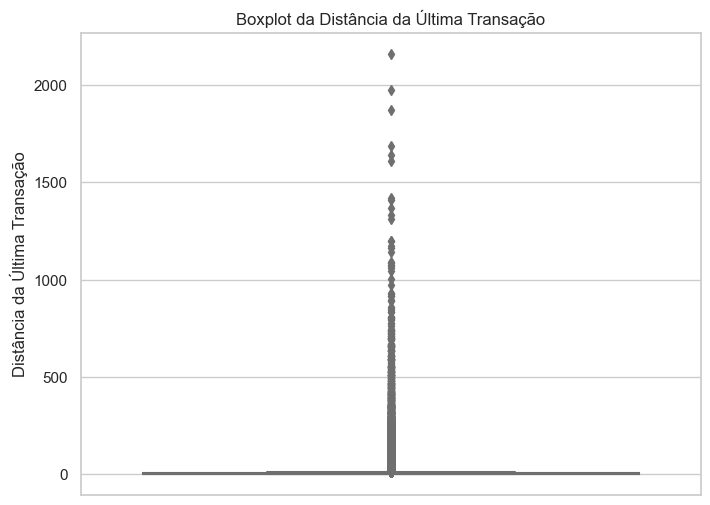

In [34]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

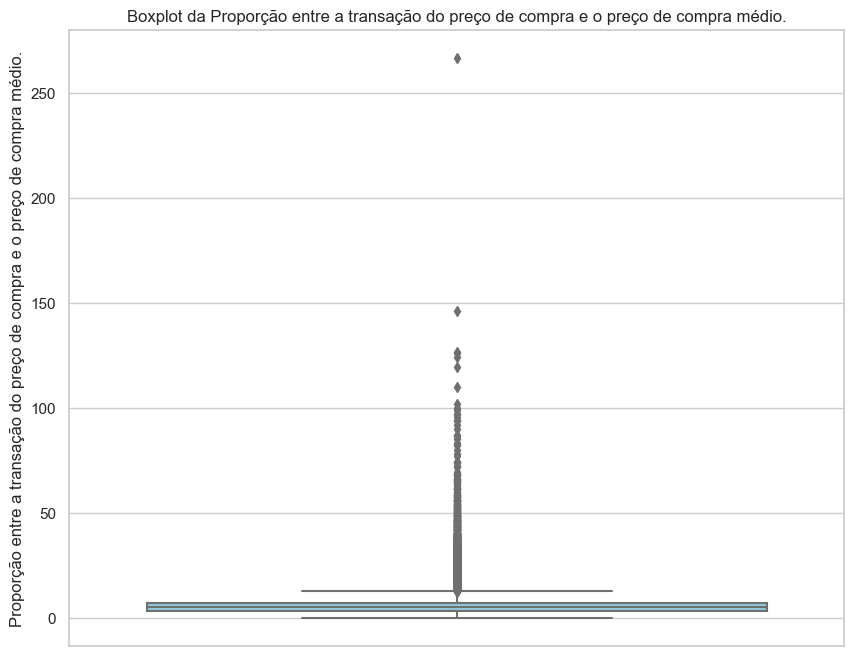

In [35]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=fraud_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

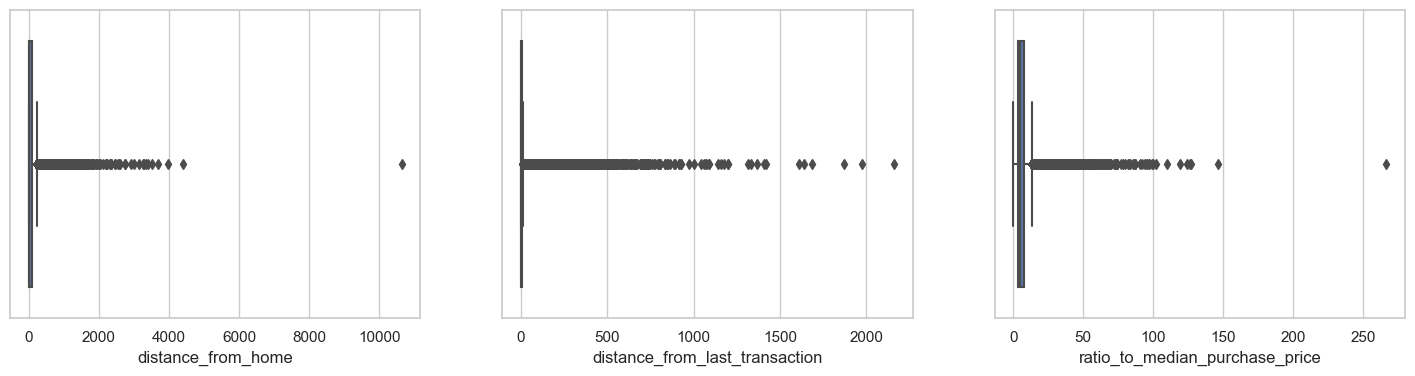

In [36]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica para detectar os outliers
plt.figure(figsize=(18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=fraud_df, x=col)
plt.show()

## Recursos Categóricos

### Distribuição de Compras em Lojas Repetidas

In [37]:
# Contando os valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = fraud_df['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    76925
0.0    10478
Name: count, dtype: int64

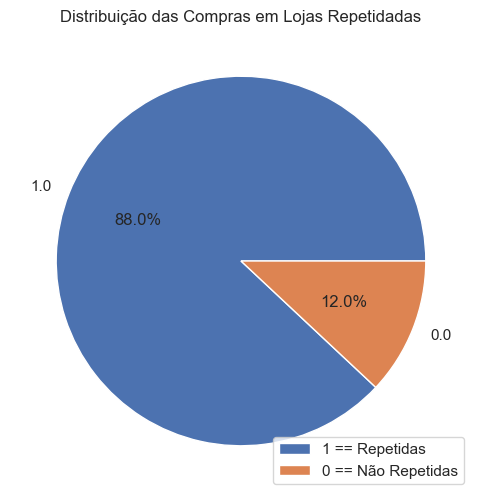

In [38]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [39]:
# Contando os valores únicos na coluna 'used_chip'
used_chip_count = fraud_df['used_chip'].value_counts()
used_chip_count

used_chip
0.0    64993
1.0    22410
Name: count, dtype: int64

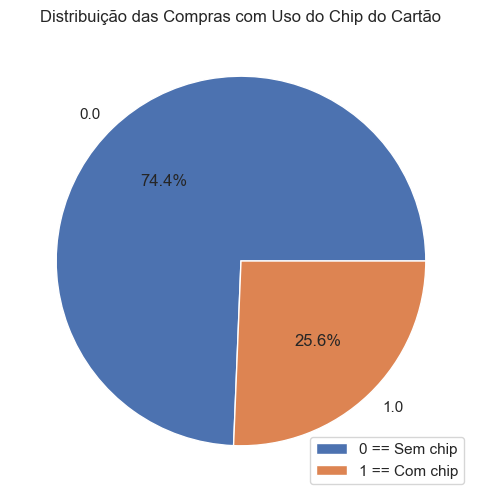

In [40]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [41]:
# Contando os valores únicos na coluna 'used_pin_number'
used_pin_number_count = fraud_df['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    87130
1.0      273
Name: count, dtype: int64

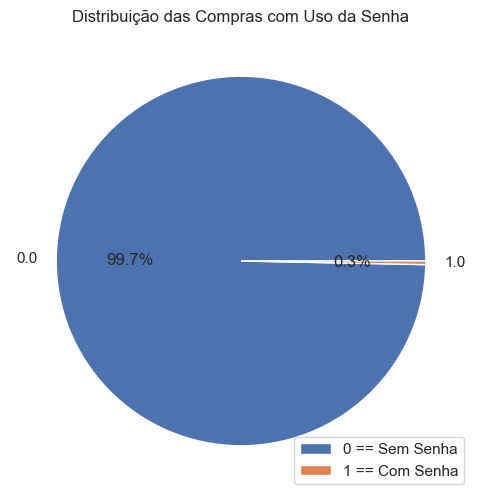

In [42]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [43]:
# Contando os valores únicos na coluna 'online_order'
online_order_count = fraud_df['online_order'].value_counts()
online_order_count

online_order
1.0    82711
0.0     4692
Name: count, dtype: int64

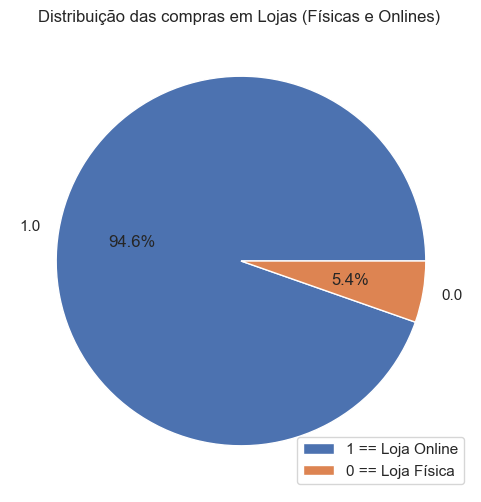

In [44]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

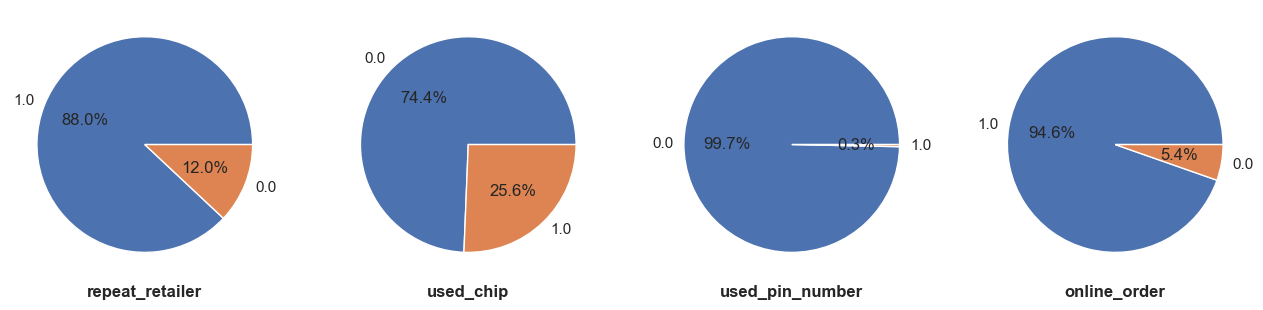

In [45]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize=(16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x=fraud_df[col].value_counts().values, 
            labels=fraud_df[col].value_counts().index, 
            autopct='%1.1f%%')
    plt.xlabel(col, weight='bold')
plt.show()

# Exemplos de análise dos dados fornecidos pelo professor e implementado nessa df

In [32]:
analise = sv.analyze(fraud_df)
analise.show_html('sweetviz.html')

prof = ProfileReport(fraud_df)
prof.to_file(output_file='pandasprof.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 549.06it/s]


# Removendo Outliers de Recursos Numéricos do DATAFRAME DE FRAUDE

## Copiando o DATAFRAME DE FRAUDE, atribuindo a uma variável DATAFRAME SEM OUTLIERS e removendo os valores outliers

In [46]:
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
Q1 = fraud_df[num_features].quantile(0.25)
Q3 = fraud_df[num_features].quantile(0.75)
IQR = Q3 - Q1
fraud_cleaned_df = fraud_df[~((fraud_df[num_features] < (Q1 - 1.5 * IQR)) | (fraud_df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apresentando o DATAFRAME SEM OUTLIERS

In [47]:
fraud_cleaned_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
5,2.530145,3.689781,8.297407,1.0,0.0,0.0,1.0
6,21.126116,0.271987,6.081771,1.0,0.0,0.0,1.0
7,151.370437,5.340081,1.171567,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
87396,106.330689,0.819417,0.750926,1.0,0.0,0.0,1.0
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0


# Mostrando o formato do DATAFRAME SEM OUTLIERS

In [48]:
# número de colunas
print(f'columns: {fraud_cleaned_df.shape[1]}')

# número de linhas
print(f'rows: {fraud_cleaned_df.shape[0]}')

columns: 7
rows: 64381


# Algumas informações estatísticas do DATAFRAME SEM OUTLIERS

In [49]:
# Criando uma tabela de estatísticas descritivas para dados
fraud_cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,64381.0,47.055662,61.384797,0.025847,4.450936,14.513070,78.965092,245.856874
distance_from_last_transaction,64381.0,1.759370,2.262137,0.000407,0.262978,0.809542,2.308785,11.000464
ratio_to_median_purchase_price,64381.0,5.409294,2.861487,0.013585,4.189452,5.169586,6.974200,13.076980
repeat_retailer,64381.0,0.878551,0.326651,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,64381.0,0.272984,0.445496,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,64381.0,0.001817,0.042591,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,64381.0,0.952874,0.211909,0.000000,1.000000,1.000000,1.000000,1.000000


# Análise Exploratória dos Dados (EDA) do DATAFRAME SEM OUTLIERS

## Recursos Numéricos do DATAFRAME SEM OUTLIERS

### Distribuição das Distâncias de Casa

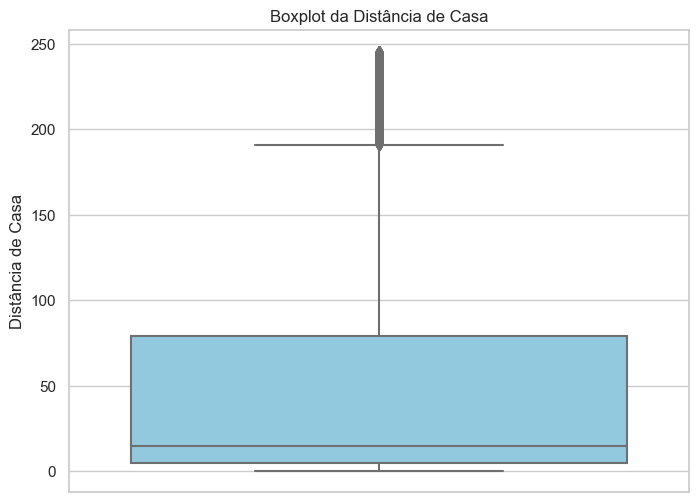

In [50]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_cleaned_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

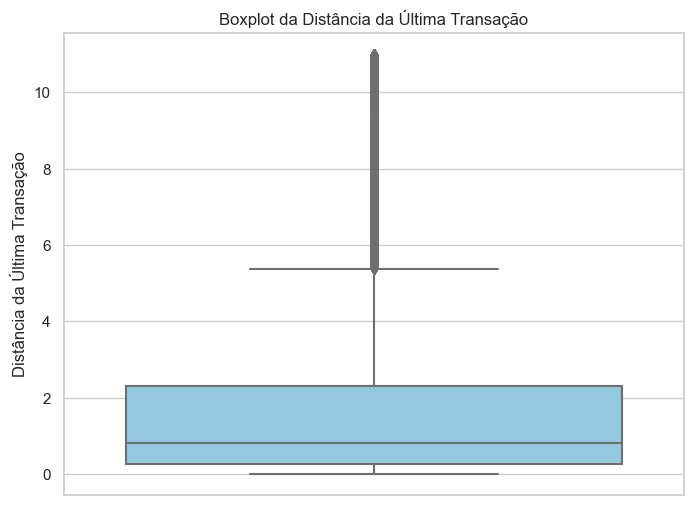

In [51]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_cleaned_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

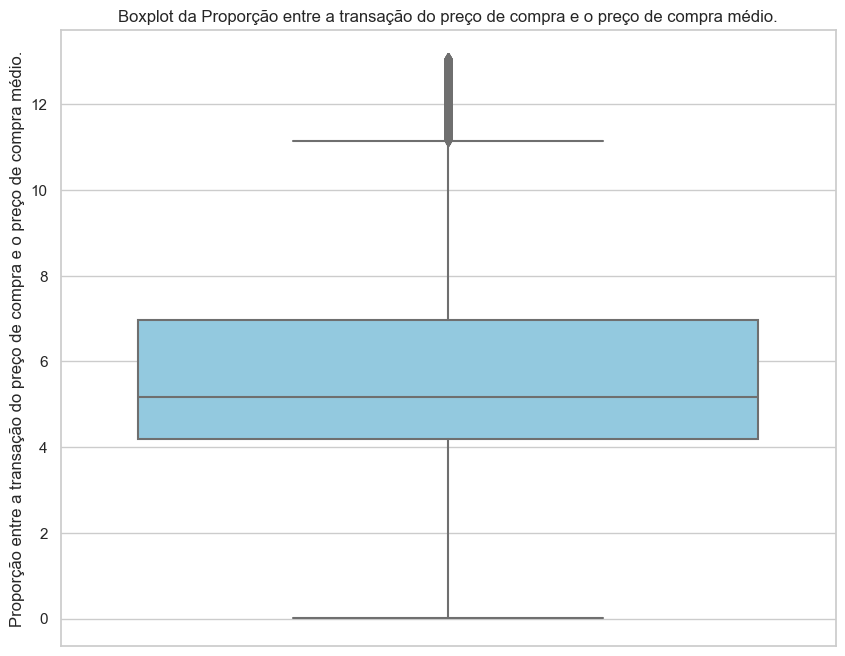

In [52]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=fraud_cleaned_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

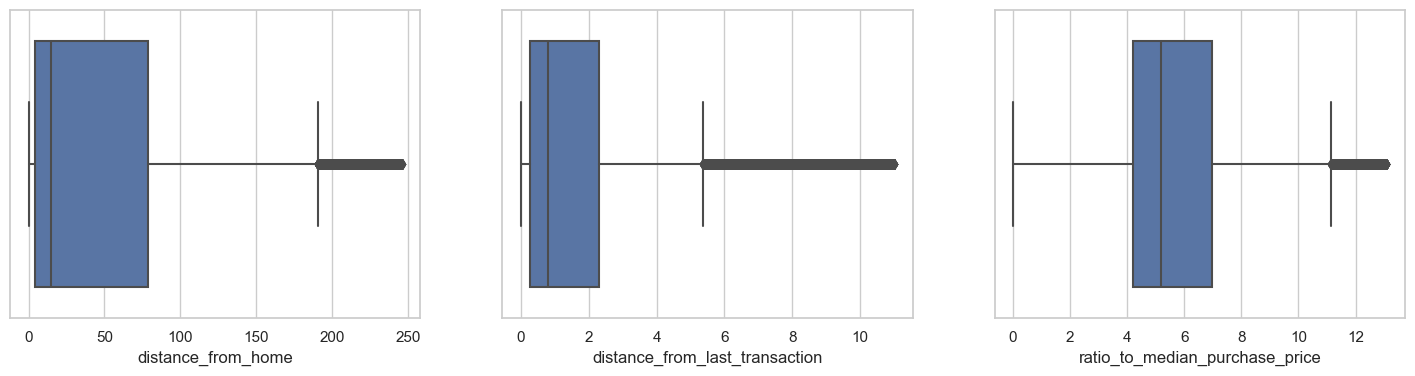

In [53]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica
plt.figure(figsize=(18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=fraud_cleaned_df, x=col)
plt.show()

## Recursos Categóricos

### Distribuição de Compras em Lojas Repetidas

In [54]:
# Contando os valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = fraud_cleaned_df['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    56562
0.0     7819
Name: count, dtype: int64

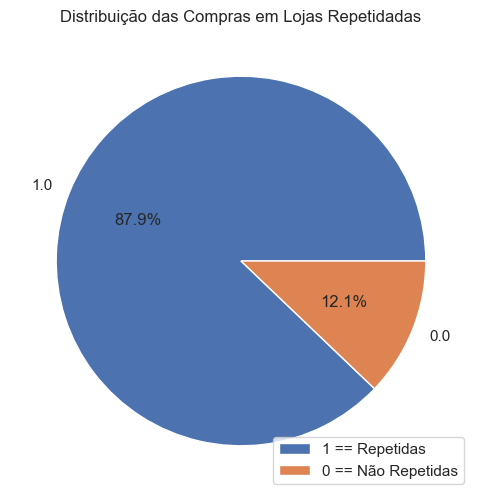

In [55]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['1 == Repetidas', '0 == Não Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [56]:
# Contando os valores únicos na coluna 'used_chip'
used_chip_count = fraud_cleaned_df['used_chip'].value_counts()
used_chip_count

used_chip
0.0    46806
1.0    17575
Name: count, dtype: int64

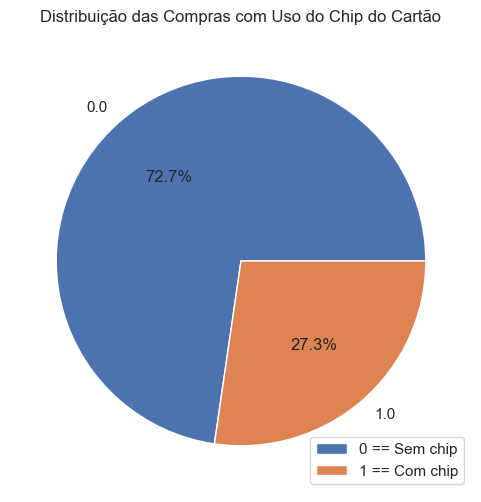

In [57]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [58]:
# Contando os valores únicos na coluna 'used_pin_number'
used_pin_number_count = fraud_cleaned_df['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    64264
1.0      117
Name: count, dtype: int64

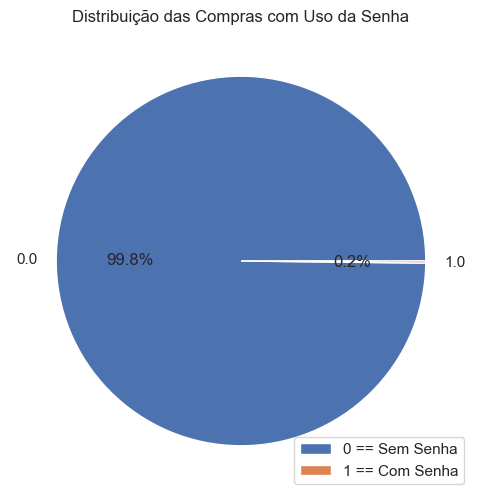

In [59]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [60]:
# Contando os valores únicos na coluna 'online_order'
online_order_count = fraud_cleaned_df['online_order'].value_counts()
online_order_count

online_order
1.0    61347
0.0     3034
Name: count, dtype: int64

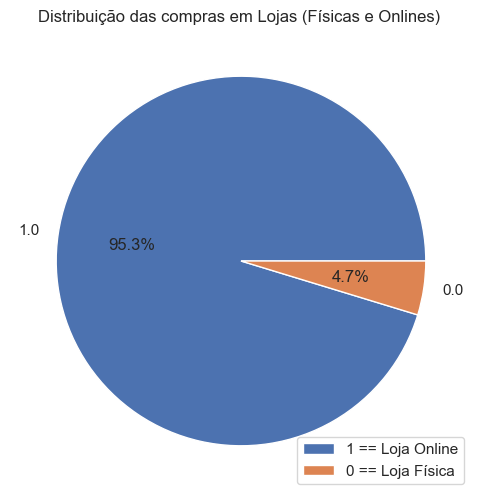

In [61]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['1 == Loja Online', '0 == Loja Física']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de todas colunas categóricas

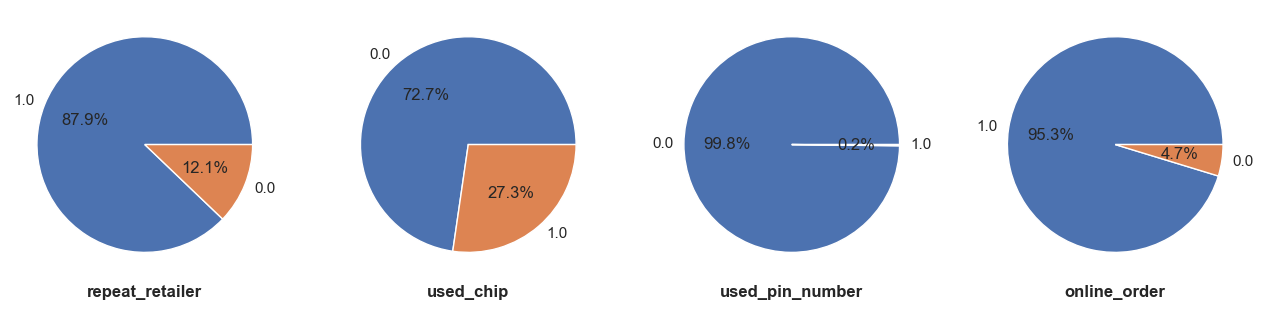

In [62]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize=(16, 12))
for i, col in enumerate(category_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x=fraud_cleaned_df[col].value_counts().values, 
            labels=fraud_cleaned_df[col].value_counts().index, 
            autopct='%1.1f%%')
    plt.xlabel(col, weight='bold')
plt.show()

# Normalização de Recurso Numéricos

In [63]:
fraud_normalized_df = fraud_cleaned_df

In [64]:
# Aplicando normalização a recursos numéricos específicos usando MinMaxScaler
scaler = MinMaxScaler()
fraud_normalized_df.loc[:, num_features] = scaler.fit_transform(fraud_normalized_df[num_features])

/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_46775/2596704470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_normalized_df.loc[:, num_features] = scaler.fit_transform(fraud_normalized_df[num_features])


# Apresentando o DATAFRAME NORMALIZADO

In [65]:
fraud_normalized_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
3,0.108553,0.141054,0.351365,1.0,1.0,0.0,1.0
4,0.043276,0.142305,0.373022,1.0,0.0,0.0,1.0
5,0.010187,0.335396,0.634125,1.0,0.0,0.0,1.0
6,0.085832,0.024689,0.464518,1.0,0.0,0.0,1.0
7,0.615645,0.485422,0.088643,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
87396,0.432431,0.074455,0.056443,1.0,0.0,0.0,1.0
87398,0.184154,0.080211,0.676951,1.0,0.0,0.0,1.0
87399,0.679792,0.025622,0.022573,1.0,0.0,0.0,1.0
87400,0.506910,0.000364,0.032250,1.0,0.0,0.0,1.0


# Algumas informações estatísticas do DATAFRAME NORMALIZADO

In [66]:
# Criando uma tabela de estatísticas descritivas para dados
fraud_normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,64381.0,0.191310,0.249703,0.0,0.018001,0.058932,0.321112,1.0
distance_from_last_transaction,64381.0,0.159905,0.205648,0.0,0.023870,0.073557,0.209851,1.0
ratio_to_median_purchase_price,64381.0,0.413040,0.219046,0.0,0.319662,0.394691,0.532834,1.0
repeat_retailer,64381.0,0.878551,0.326651,0.0,1.000000,1.000000,1.000000,1.0
used_chip,64381.0,0.272984,0.445496,0.0,0.000000,0.000000,1.000000,1.0
used_pin_number,64381.0,0.001817,0.042591,0.0,0.000000,0.000000,0.000000,1.0
online_order,64381.0,0.952874,0.211909,0.0,1.000000,1.000000,1.000000,1.0


# Análise Exploratória dos Dados (EDA) do DATAFRAME NORMALIZADO

## Recursos Numéricos

### Distribuição das Distâncias de Casa

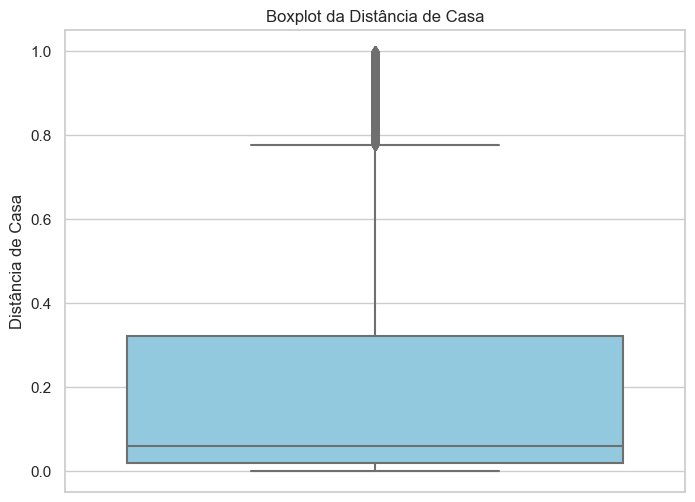

In [67]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_normalized_df, y='distance_from_home', color='skyblue')
plt.title('Boxplot da Distância de Casa')
plt.ylabel('Distância de Casa')

plt.show()

### Distribuição das Distâncias da Última da Transação

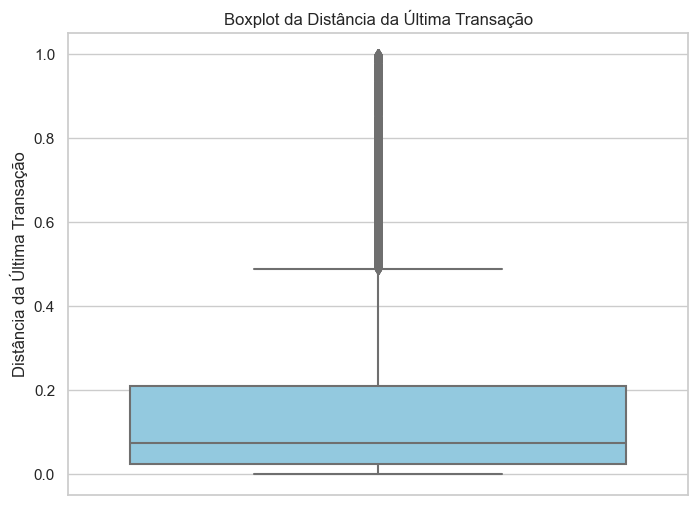

In [68]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.boxplot(data=fraud_normalized_df, y='distance_from_last_transaction', color='skyblue')
plt.title('Boxplot da Distância da Última Transação')
plt.ylabel('Distância da Última Transação')

plt.show()

### Distribuição da Proporção entre a transação do preço de compra e o preço de compra médio

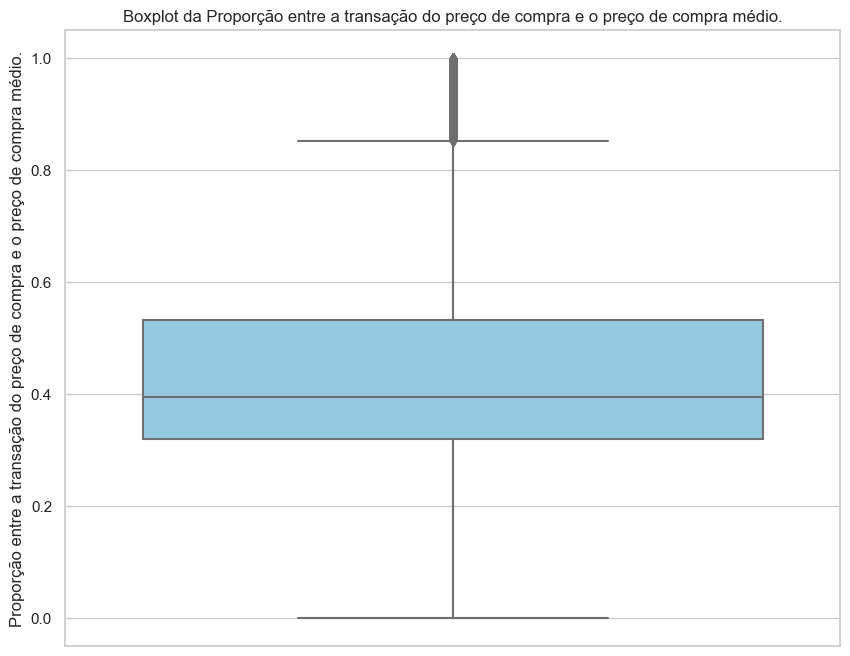

In [69]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotando o boxplot para 'ratio_to_median_purchase_price'
plt.figure(figsize=(10, 8))
sns.boxplot(data=fraud_normalized_df, y='ratio_to_median_purchase_price', color='skyblue')
plt.title('Boxplot da Proporção entre a transação do preço de compra e o preço de compra médio.')
plt.ylabel('Proporção entre a transação do preço de compra e o preço de compra médio.')

plt.show()

### Distribuição de todas colunas númericas

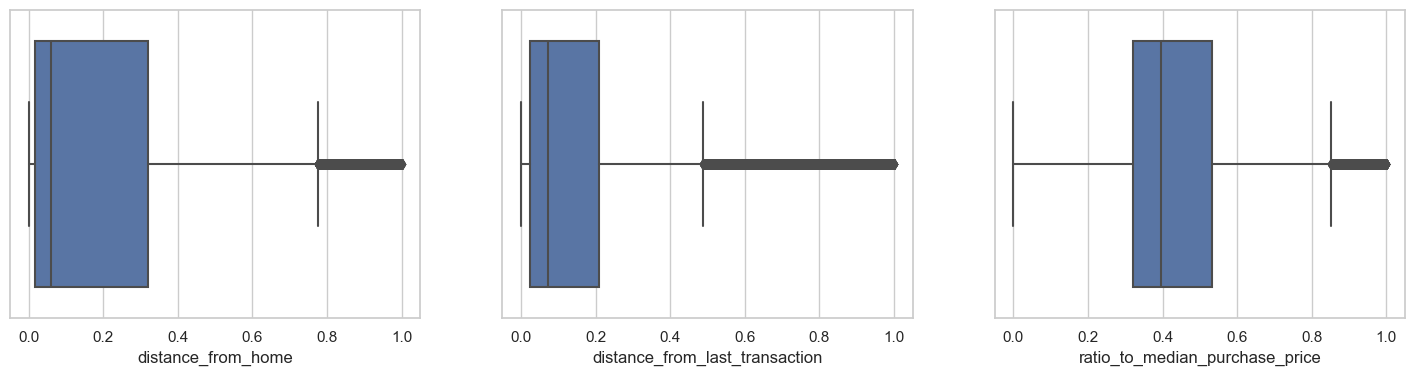

In [70]:
# Desenhando um boxplot para exibir a distribuição de cada coluna numérica 
plt.figure(figsize=(18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=fraud_normalized_df, x=col)
plt.show()

# KMEANS Algorithm

### Definicoes

In [71]:
n_broad_clusters = range(2, 15)

# treinamento KMeans
max_iteration = 10_000
n_initial = 100, 
random_state_num = 61658

n_clusters = 4

## Preparação dos dados para aplicação do KMEANS

In [72]:
clusters_distortion = []
for n_clus in n_broad_clusters:
    print(n_clus)
    clusters_distortion.append(KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=61658).fit(fraud_cleaned_df).inertia_ )

2
3
4
5
6
7
8
9
10
11
12
13
14


In [73]:
clusters_distortion

[19334.295402707103,
 13188.532926941585,
 9489.71058451321,
 7770.436494242456,
 6440.302730156276,
 5553.456590095102,
 4645.861819226773,
 4152.772281010892,
 3672.3614773448685,
 3337.405994998789,
 3069.0889010567917,
 2835.4055119052255,
 2625.6952120744795]

## Método do Cotovelo

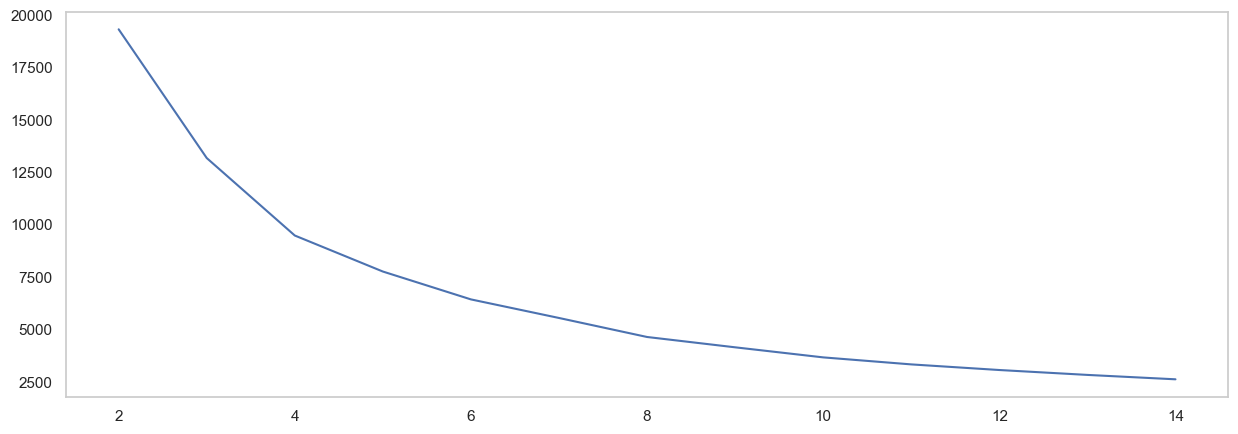

In [74]:
plt.figure(figsize=(15,5))
plt.plot(n_broad_clusters, clusters_distortion)
plt.grid()

## Cálculo para achar a quantidade ideal de clusters

#### https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

In [75]:
x1, y1 = 2, clusters_distortion[0]
x2, y2 = 20, clusters_distortion[len(clusters_distortion)-1]

distances = []
for i in range(len(clusters_distortion)):
    x0 = i+2
    y0 = clusters_distortion[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
num_clus = distances.index(max(distances)) + 2
num_clus

6

## Clusterização

In [76]:
km = KMeans(n_clusters=num_clus, max_iter=10_000, n_init=100, random_state=61658)
clusters_classes = km.fit_predict(fraud_cleaned_df)
clusters_classes

array([1, 0, 0, ..., 2, 2, 1], dtype=int32)

### Criando uma cópia do dataframe de frauds para anexar os clusters

In [77]:
clustered_df = fraud_cleaned_df

## Anexando os agrupamentos em suas linhas especificas no dataframe

In [78]:
clustered_df.loc[:, 'clus'] = clusters_classes
clustered_df

/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_46775/309133831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df.loc[:, 'clus'] = clusters_classes


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,clus
3,0.108553,0.141054,0.351365,1.0,1.0,0.0,1.0,1
4,0.043276,0.142305,0.373022,1.0,0.0,0.0,1.0,0
5,0.010187,0.335396,0.634125,1.0,0.0,0.0,1.0,0
6,0.085832,0.024689,0.464518,1.0,0.0,0.0,1.0,0
7,0.615645,0.485422,0.088643,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...
87396,0.432431,0.074455,0.056443,1.0,0.0,0.0,1.0,2
87398,0.184154,0.080211,0.676951,1.0,0.0,0.0,1.0,0
87399,0.679792,0.025622,0.022573,1.0,0.0,0.0,1.0,2
87400,0.506910,0.000364,0.032250,1.0,0.0,0.0,1.0,2


### Selecionando os dados de um cluster específico

In [79]:
clustered_df.loc[fraud_cleaned_df.clus==1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,clus
3,0.108553,0.141054,0.351365,1.0,1.0,0.0,1.0,1
26,0.023344,0.056739,0.654680,1.0,1.0,0.0,1.0,1
27,0.029306,0.366262,0.438824,1.0,1.0,0.0,1.0,1
30,0.098896,0.127109,0.475926,1.0,1.0,0.0,1.0,1
44,0.054588,0.052950,0.371625,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...
87375,0.012757,0.345941,0.520315,1.0,1.0,0.0,1.0,1
87388,0.016170,0.008669,0.316611,1.0,1.0,0.0,1.0,1
87389,0.050327,0.663678,0.644535,1.0,1.0,0.0,1.0,1
87395,0.060306,0.656171,0.816537,1.0,1.0,0.0,1.0,1


# Aplicando PCA

In [81]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(clustered_df[num_features])
clustered_df['pca1'] = principal_components[:, 0]
clustered_df['pca2'] = principal_components[:, 1]

/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_46775/2573659779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['pca1'] = principal_components[:, 0]
/var/folders/nm/hxs4p4910kdbl0j_j_d85hsc0000gn/T/ipykernel_46775/2573659779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['pca2'] = principal_components[:, 1]


# Visualizando os clusters

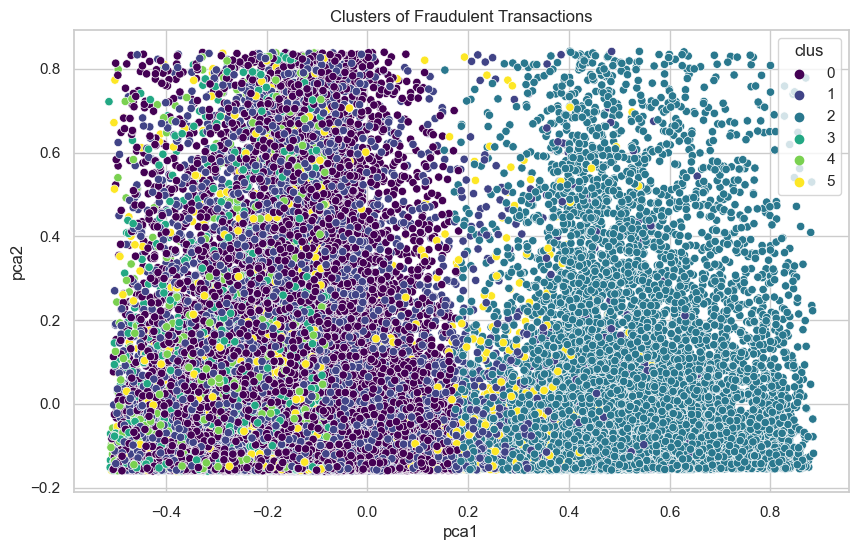

In [84]:
# Step 10: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x='pca1', y='pca2', hue='clus', palette='viridis')
plt.title('Clusters of Fraudulent Transactions')
plt.show()

# Apresentando padrões ocultos separadamente para características numéricas e categóricas

## Análise geral para recursos numéricos

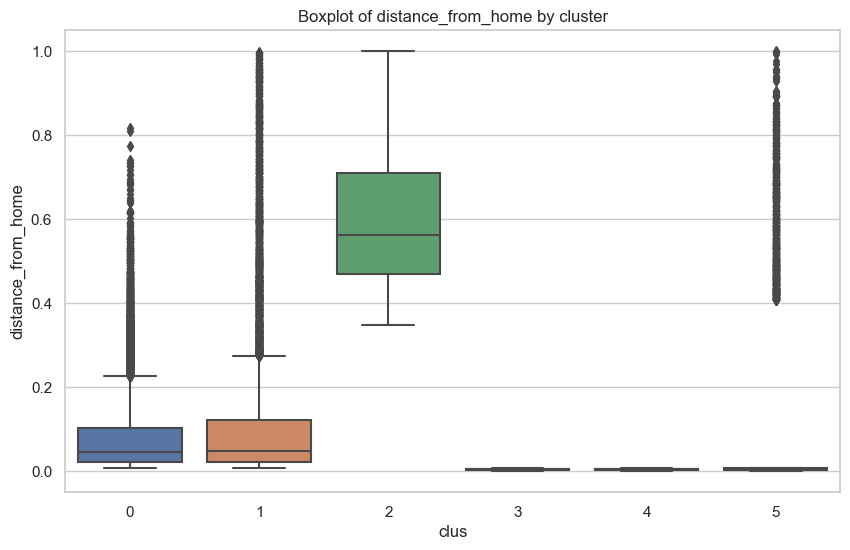

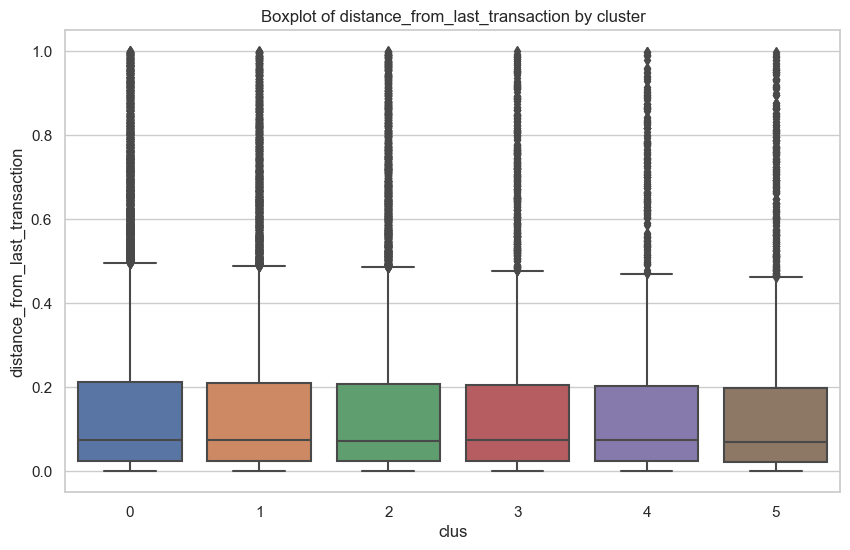

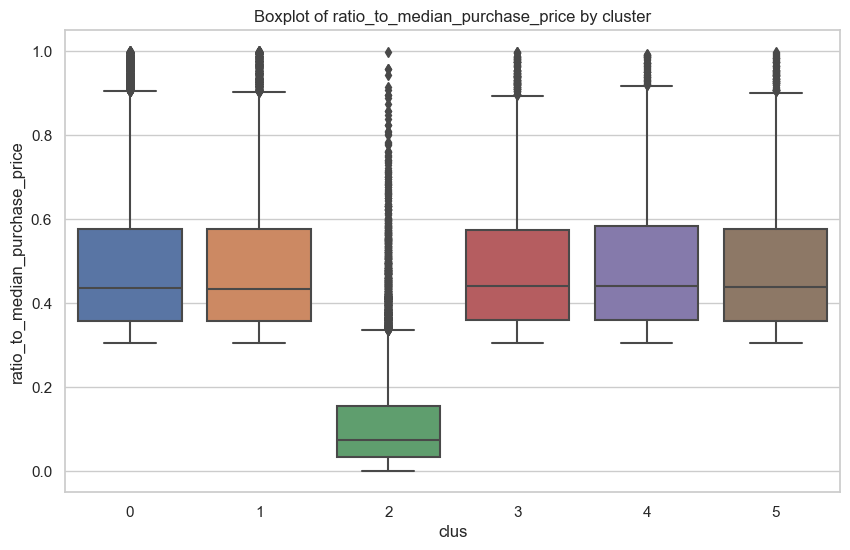

In [87]:
for column in num_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='clus', y=column, data=clustered_df)
    plt.title(f'Boxplot of {column} by cluster')
    plt.show()

## Análise geral para recursos categóricos

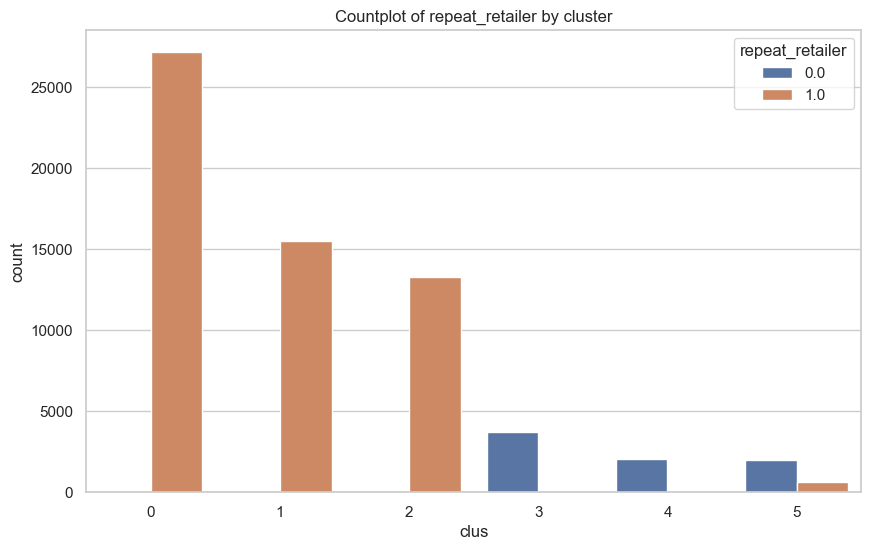

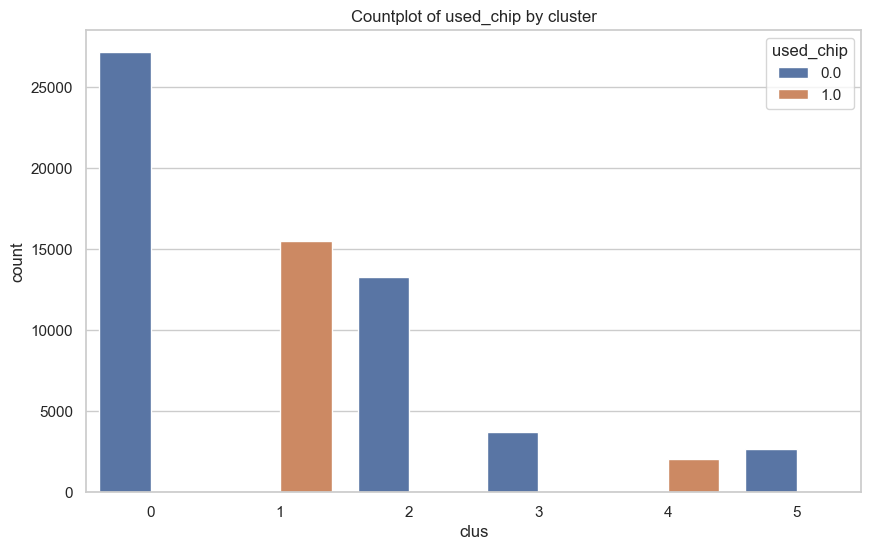

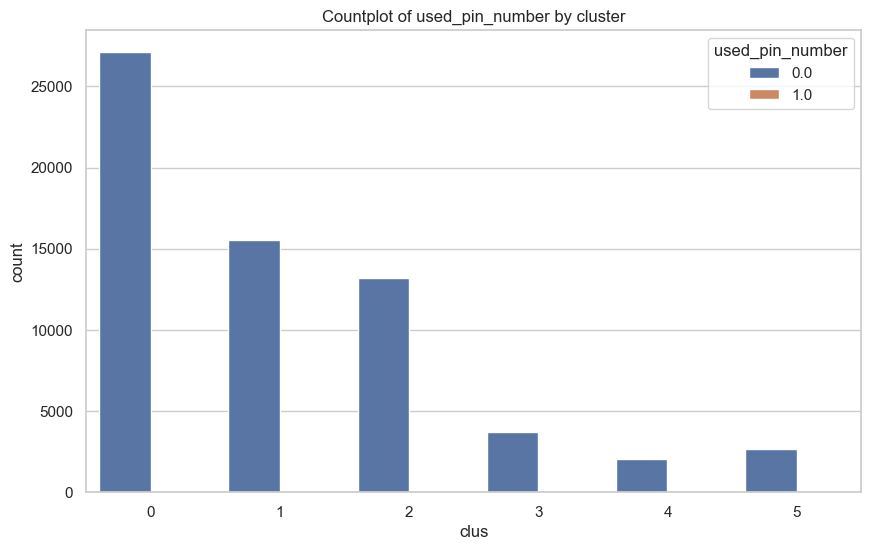

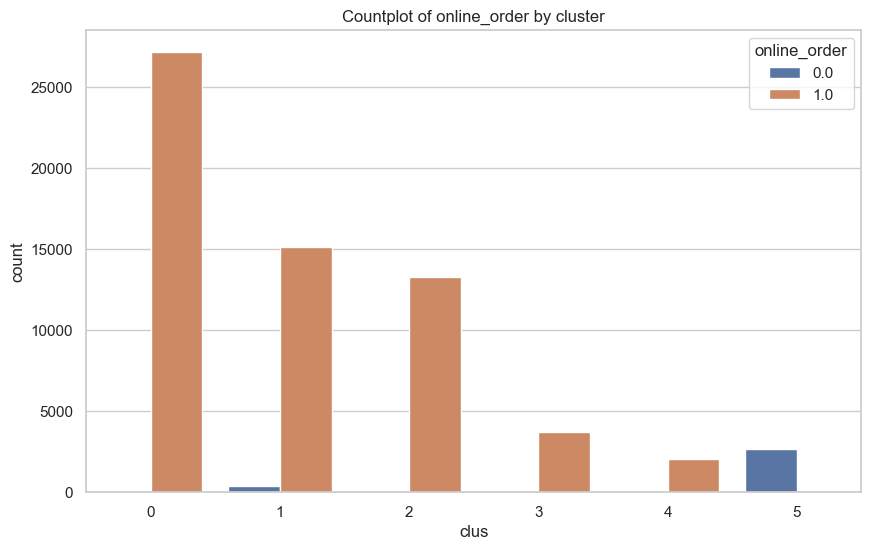

In [88]:
for column in category_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='clus', hue=column, data=clustered_df)
    plt.title(f'Countplot of {column} by cluster')
    plt.show()

## Análise de cada cluster separadamente

Cluster 0 Description:
       distance_from_home  distance_from_last_transaction  \
count        27140.000000                    27140.000000   
mean             0.080447                        0.160752   
std              0.089833                        0.206427   
min              0.007625                        0.000000   
25%              0.021539                        0.023451   
50%              0.046159                        0.073791   
75%              0.103462                        0.212199   
max              0.816162                        0.999802   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
count                    27140.000000          27140.0    27140.0   
mean                         0.489863              1.0        0.0   
std                          0.167226              0.0        0.0   
min                          0.305179              1.0        0.0   
25%                          0.358124              1.0        0.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


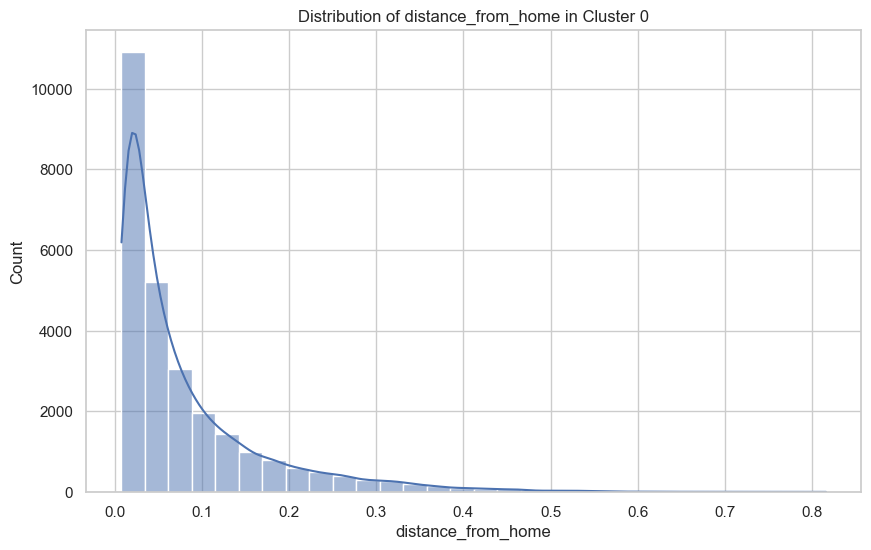

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


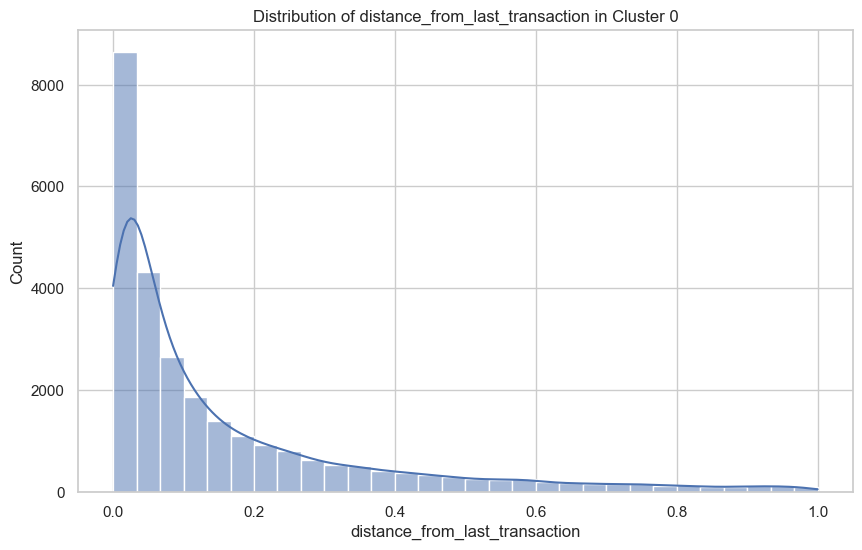

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


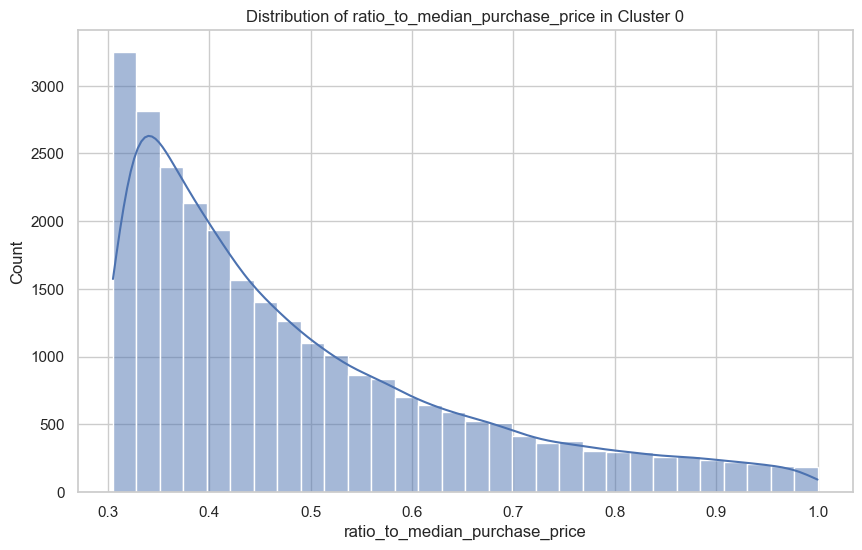

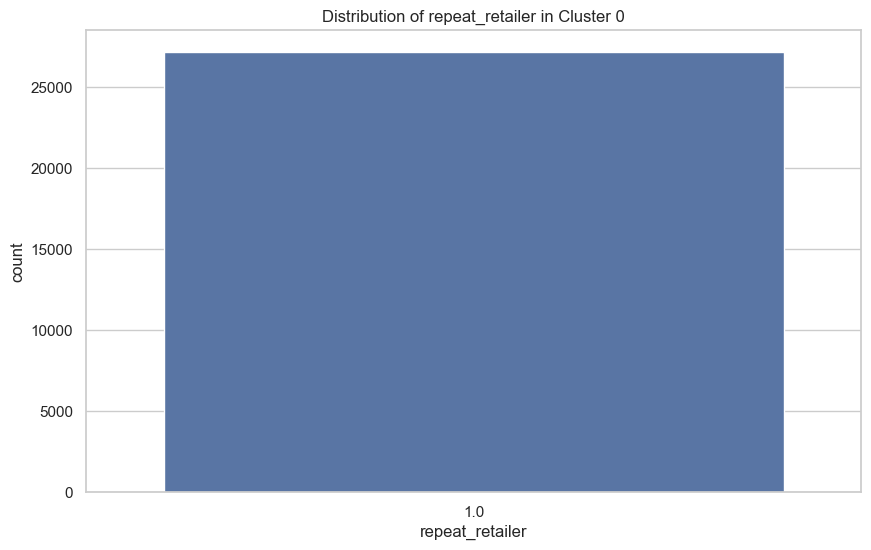

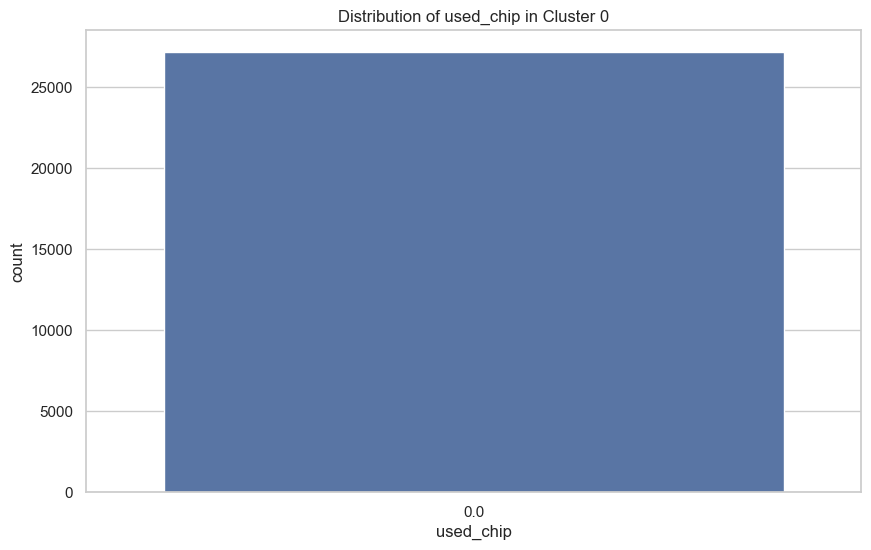

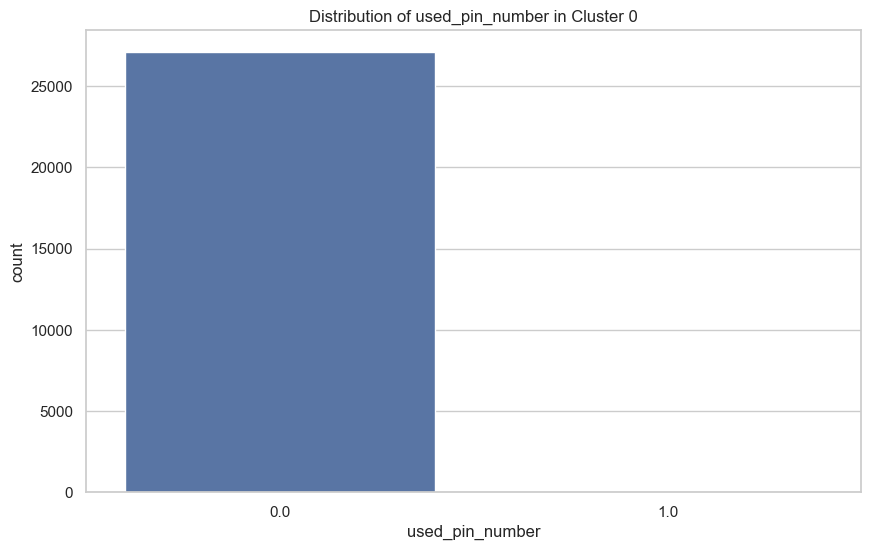

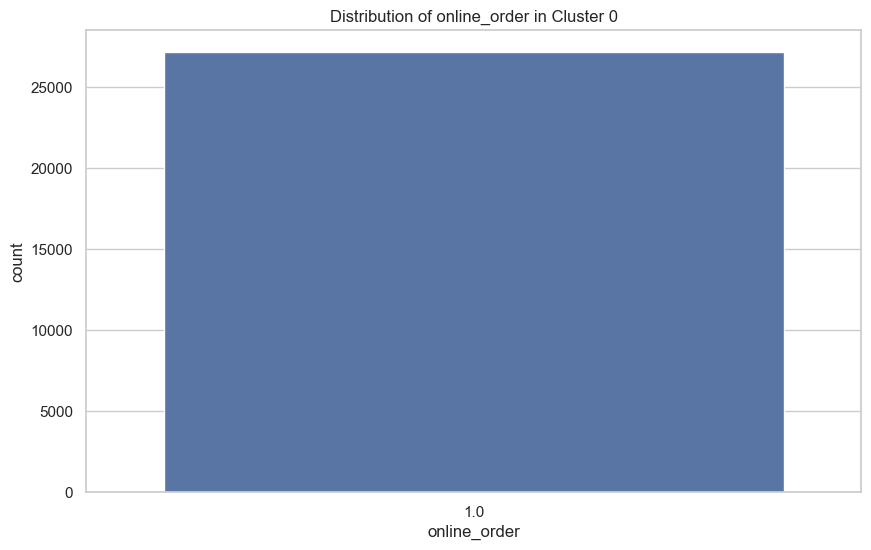

Cluster 1 Description:
       distance_from_home  distance_from_last_transaction  \
count        15511.000000                    15511.000000   
mean             0.110658                        0.161082   
std              0.158098                        0.206292   
min              0.007628                        0.000079   
25%              0.022127                        0.024360   
50%              0.048894                        0.074870   
75%              0.122843                        0.209841   
max              0.999049                        0.999746   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
count                    15511.000000          15511.0    15511.0   
mean                         0.489392              1.0        1.0   
std                          0.167626              0.0        0.0   
min                          0.305184              1.0        1.0   
25%                          0.358195              1.0        1.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


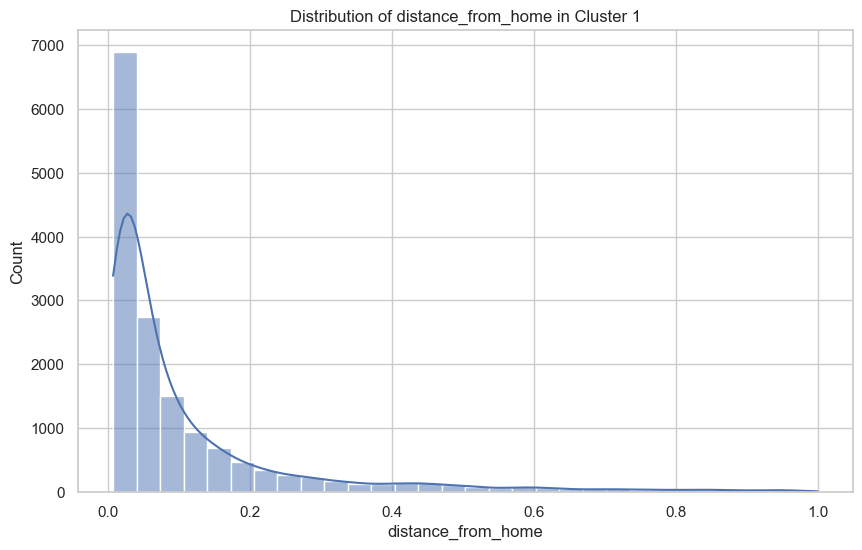

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


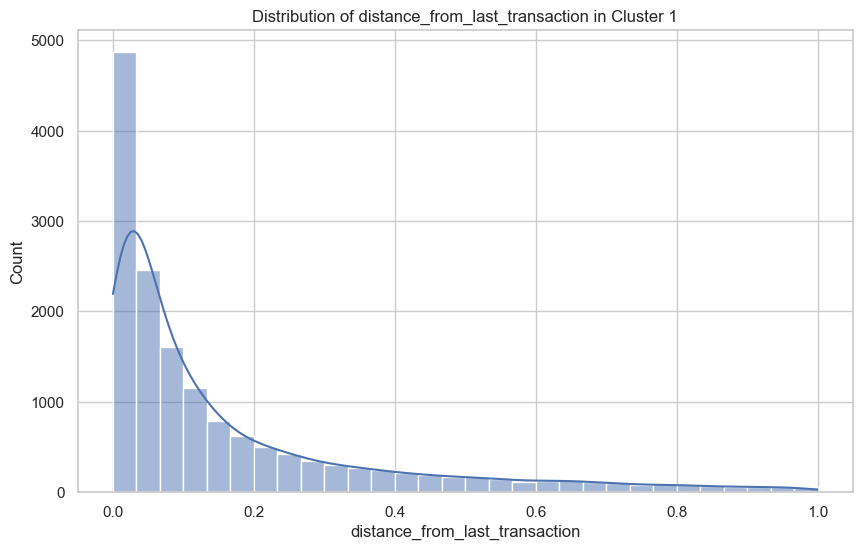

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


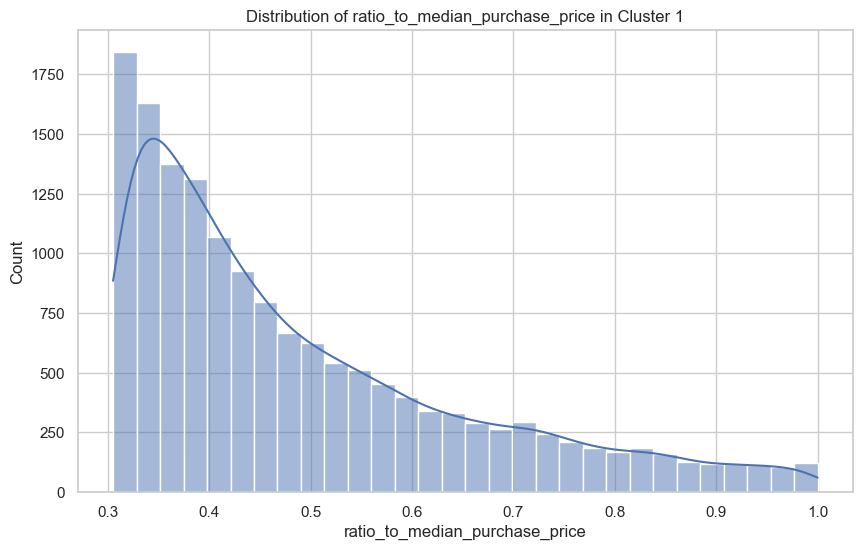

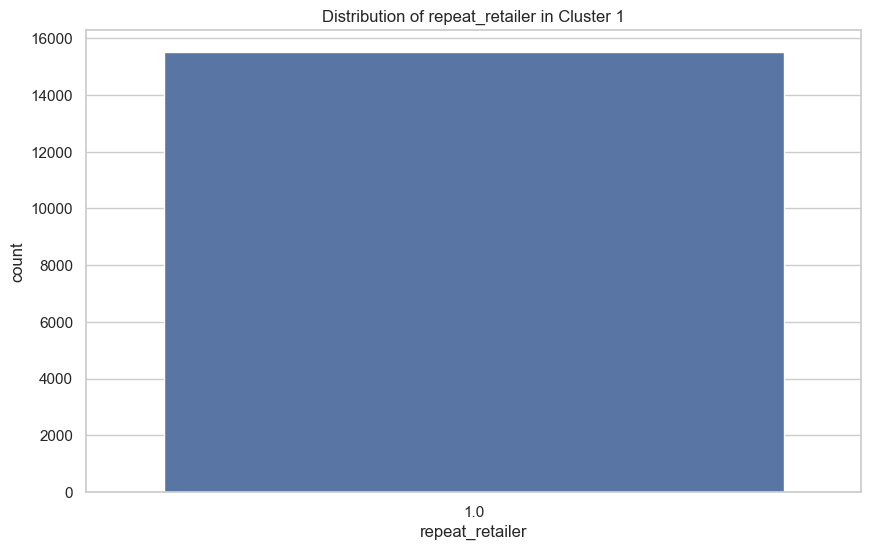

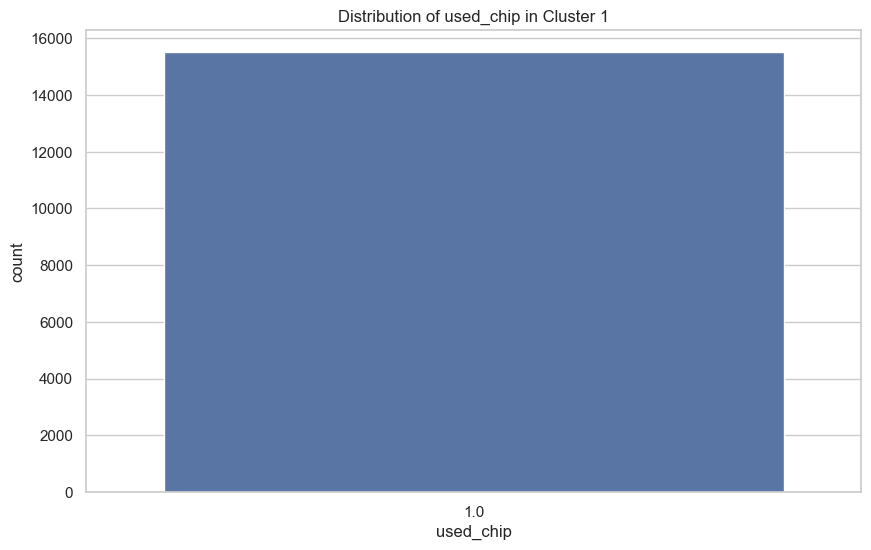

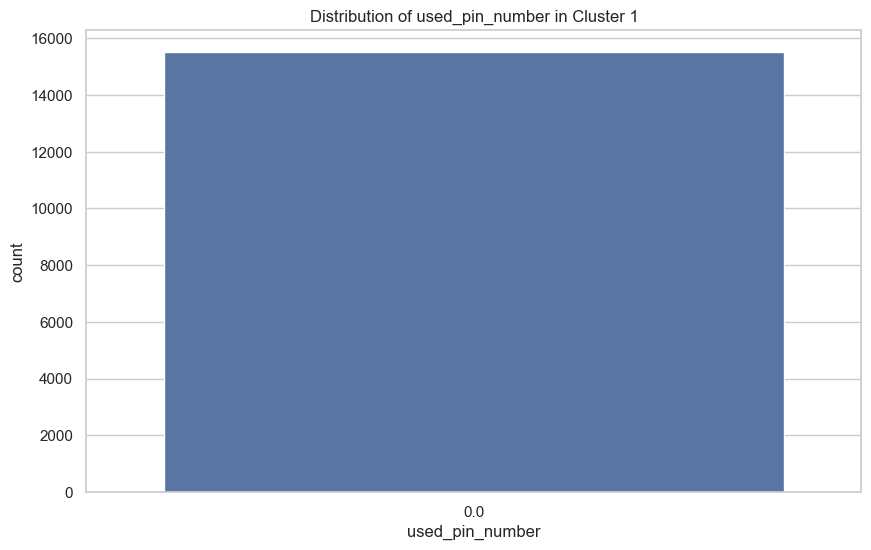

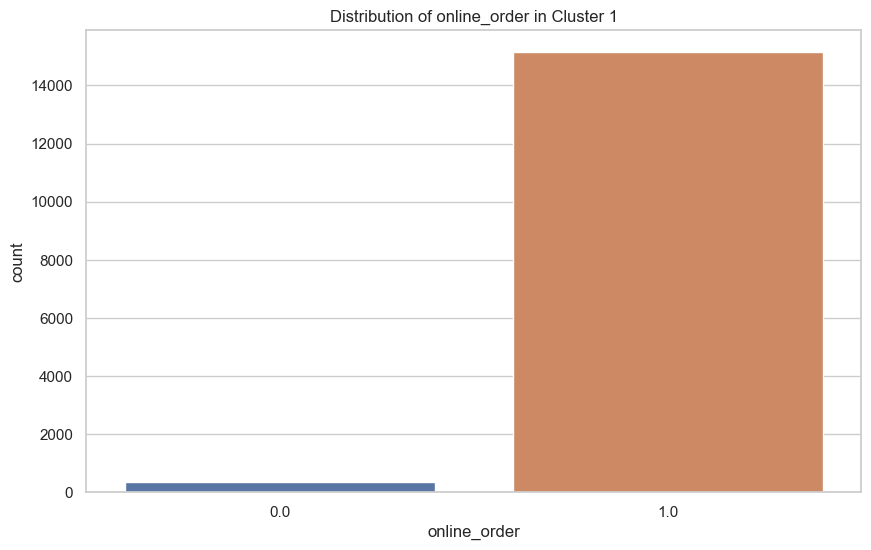

Cluster 2 Description:
       distance_from_home  distance_from_last_transaction  \
count        13279.000000                    13279.000000   
mean             0.603518                        0.158128   
std              0.158468                        0.203124   
min              0.347027                        0.000060   
25%              0.469864                        0.024240   
50%              0.563577                        0.072185   
75%              0.710334                        0.208837   
max              1.000000                        1.000000   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
count                    13279.000000          13279.0    13279.0   
mean                         0.117367              1.0        0.0   
std                          0.122752              0.0        0.0   
min                          0.000000              1.0        0.0   
25%                          0.034186              1.0        0.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


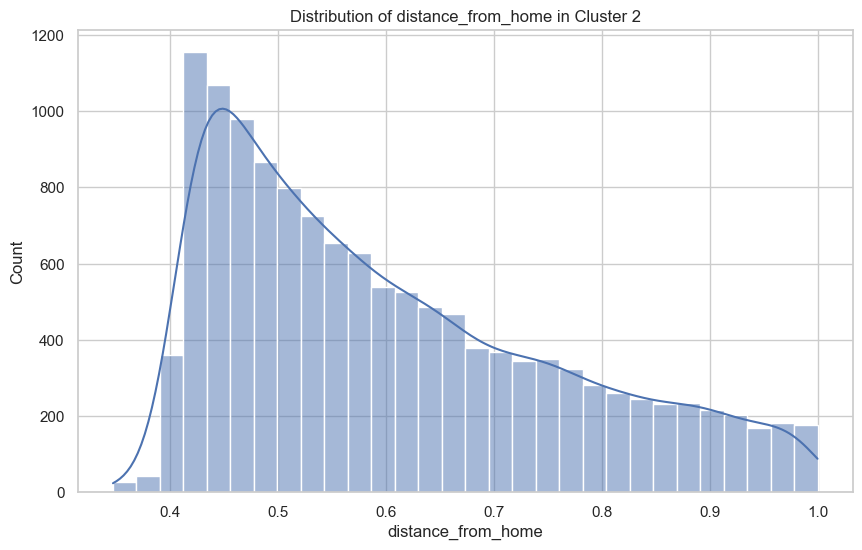

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


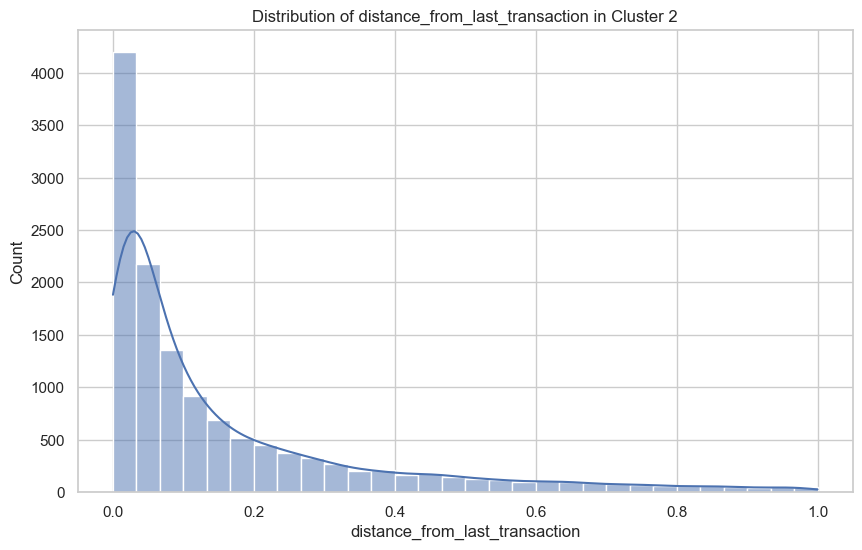

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


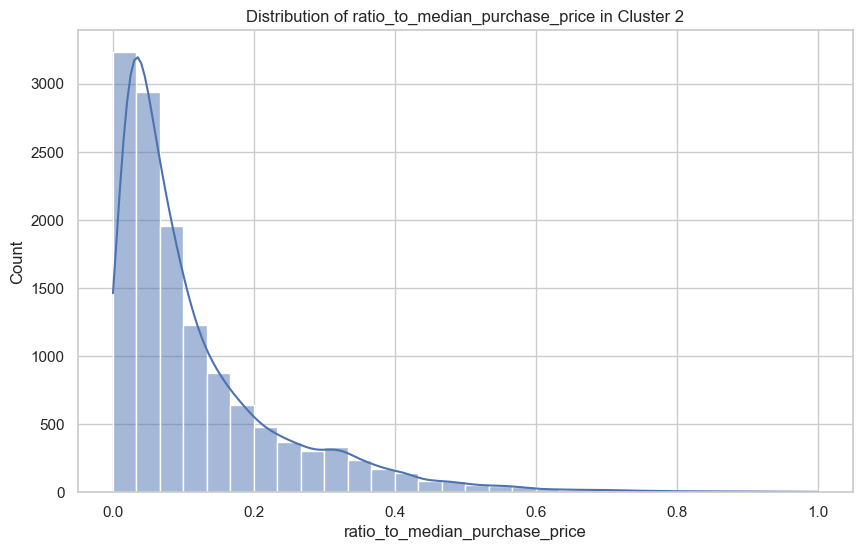

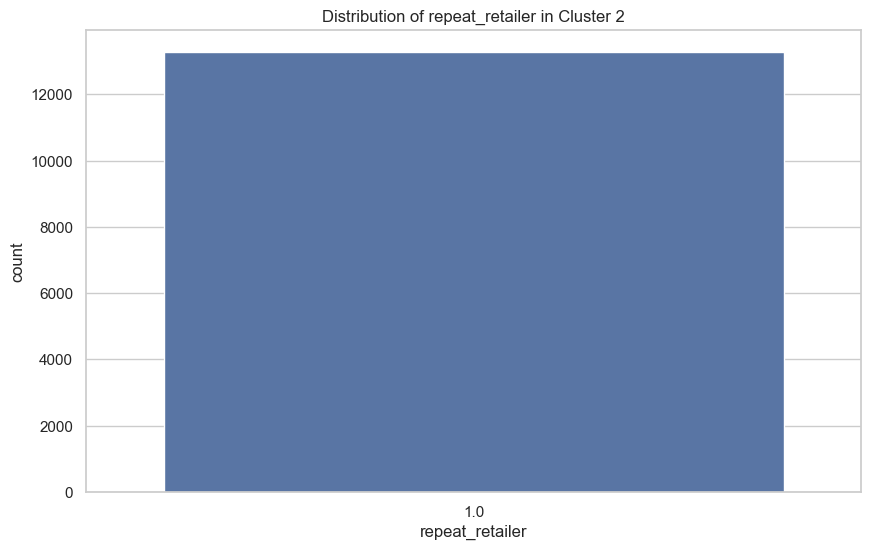

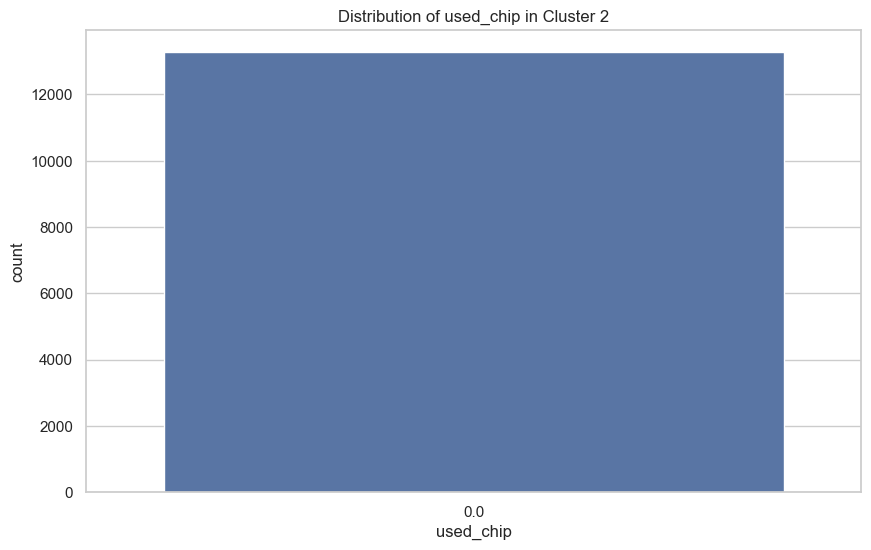

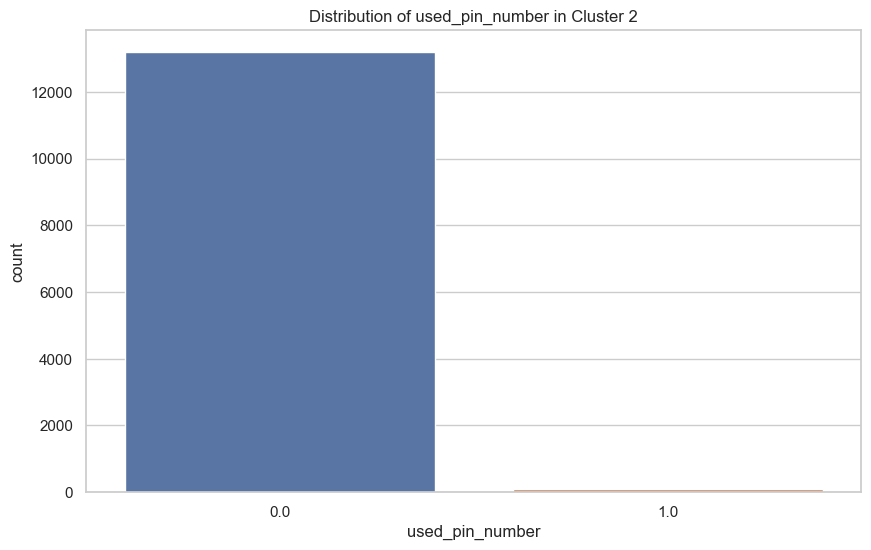

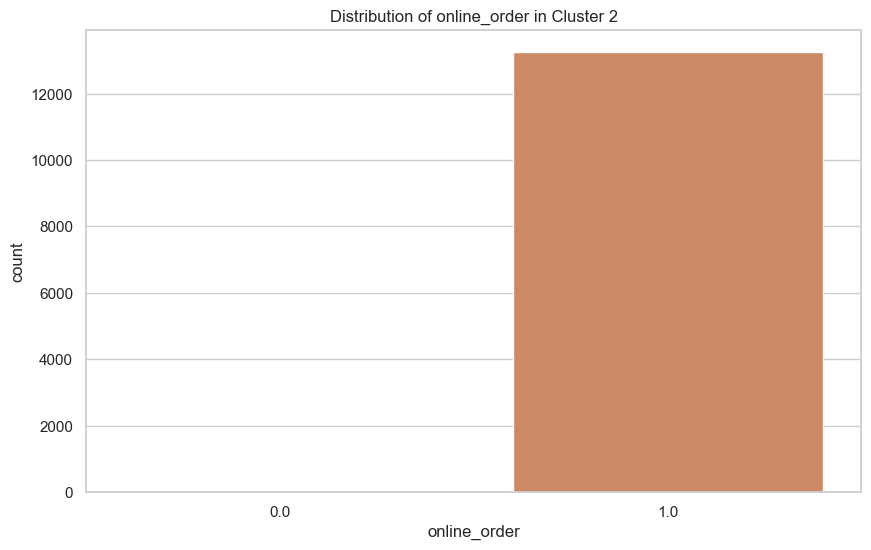

Cluster 3 Description:
       distance_from_home  distance_from_last_transaction  \
count         3741.000000                     3741.000000   
mean             0.004373                        0.157861   
std              0.001984                        0.204340   
min              0.000050                        0.000064   
25%              0.002780                        0.023805   
50%              0.004502                        0.073721   
75%              0.006062                        0.205371   
max              0.007623                        0.999811   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
count                     3741.000000           3741.0     3741.0   
mean                         0.490824              0.0        0.0   
std                          0.164802              0.0        0.0   
min                          0.305257              0.0        0.0   
25%                          0.360531              0.0        0.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


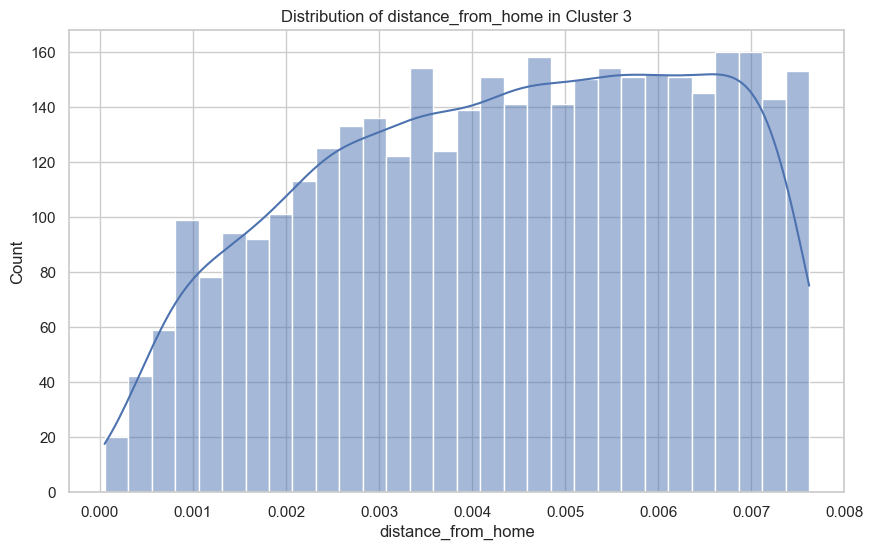

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


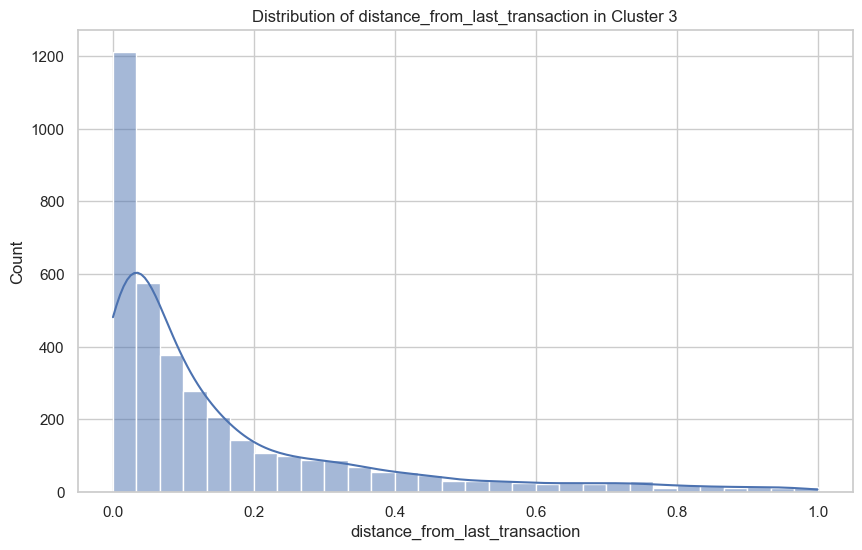

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


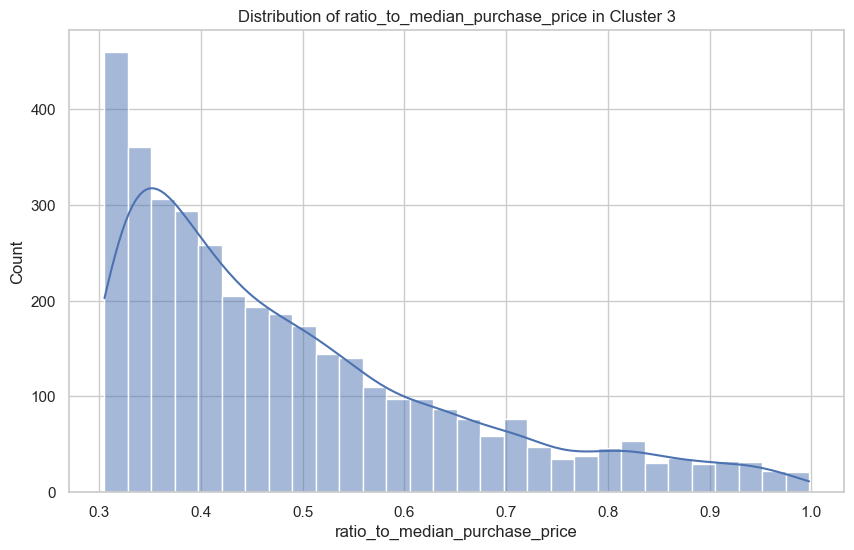

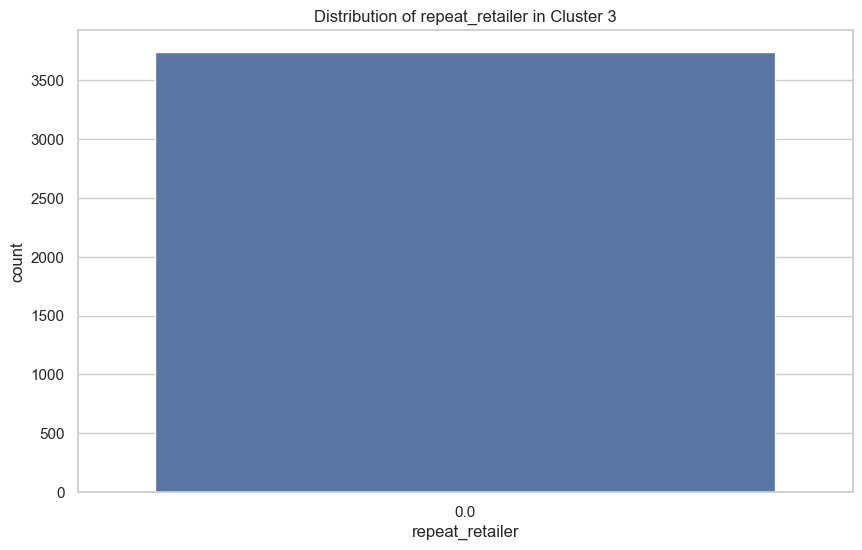

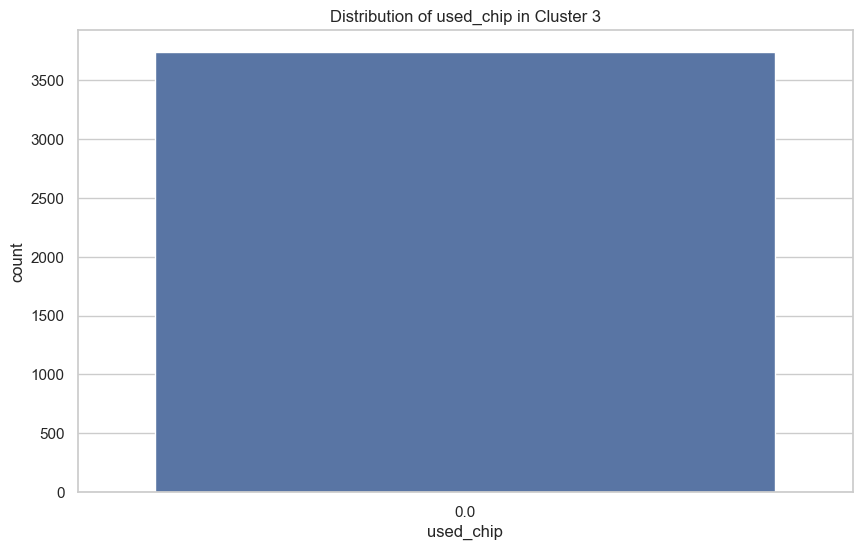

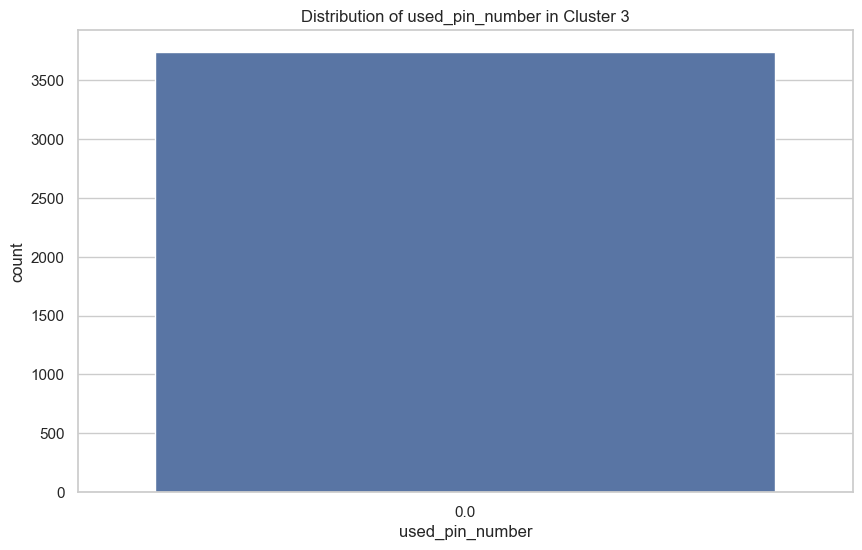

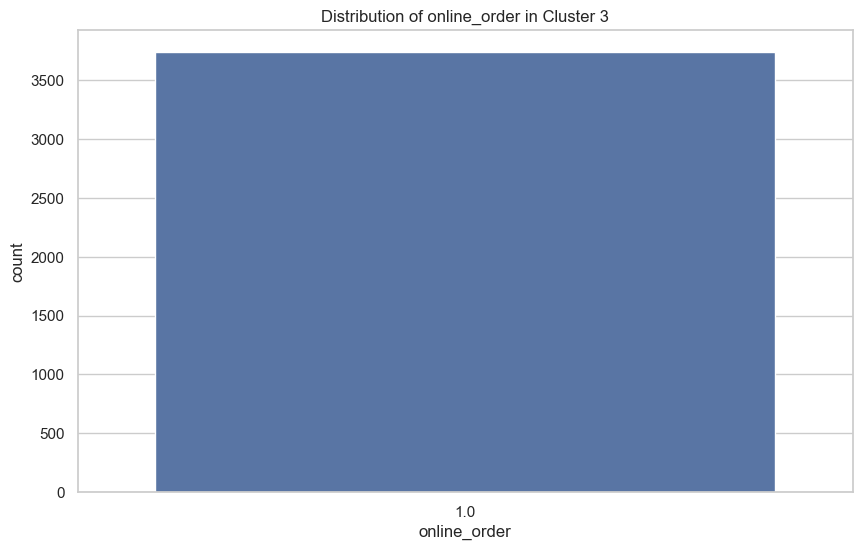

Cluster 4 Description:
       distance_from_home  distance_from_last_transaction  \
count         2064.000000                     2064.000000   
mean             0.004350                        0.157340   
std              0.001979                        0.206121   
min              0.000055                        0.000051   
25%              0.002773                        0.023515   
50%              0.004359                        0.073726   
75%              0.006059                        0.202081   
max              0.007621                        0.999090   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
count                     2064.000000           2064.0     2064.0   
mean                         0.491051              0.0        1.0   
std                          0.164779              0.0        0.0   
min                          0.305304              0.0        1.0   
25%                          0.360962              0.0        1.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


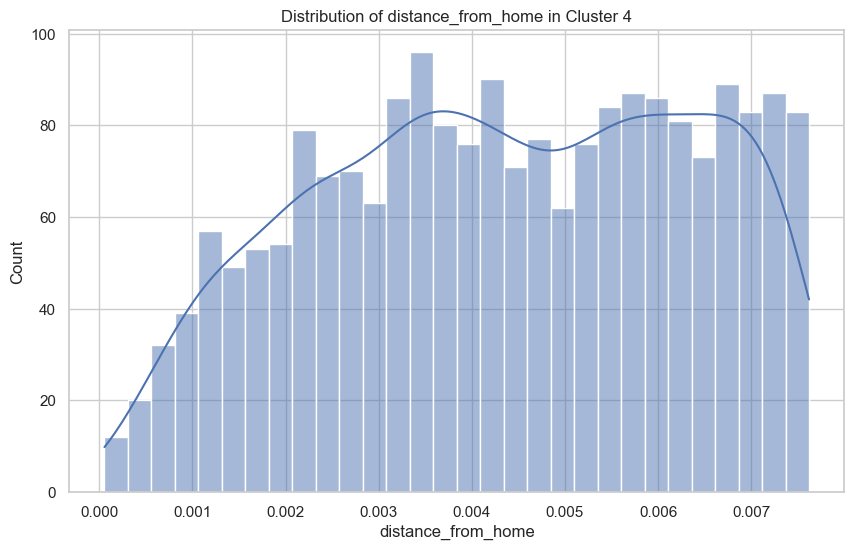

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


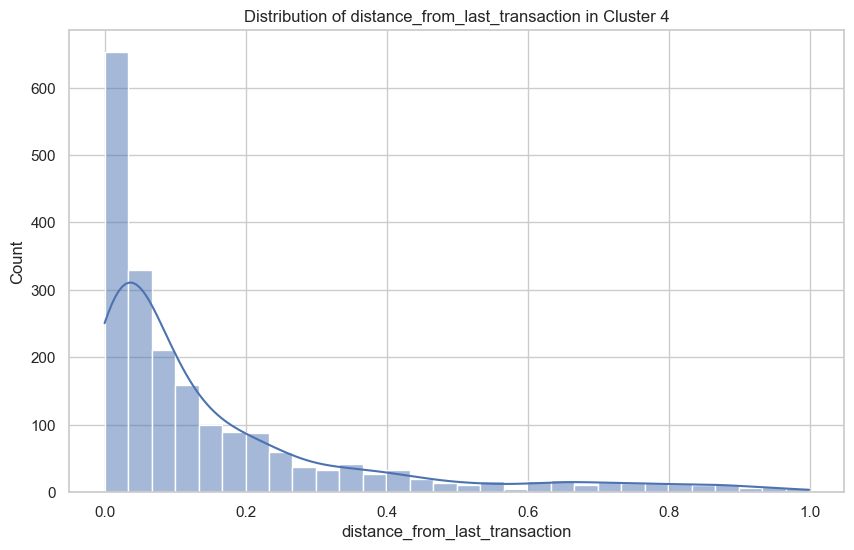

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


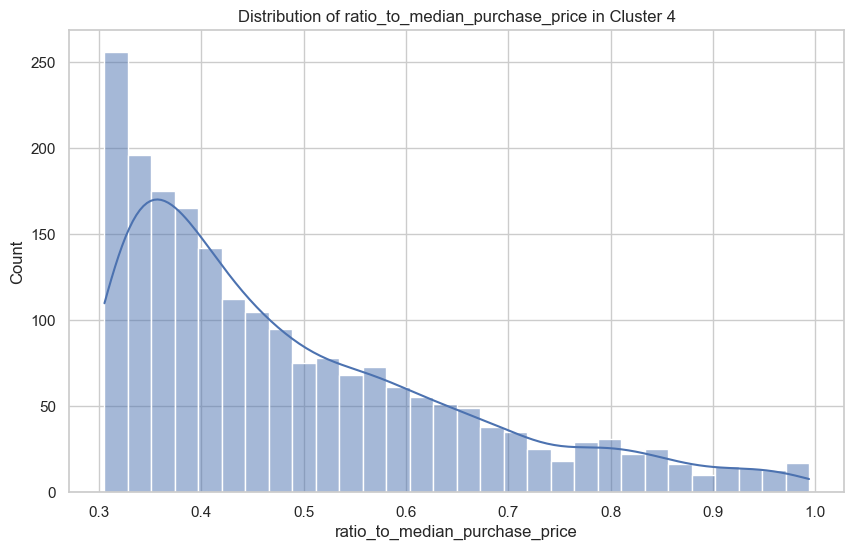

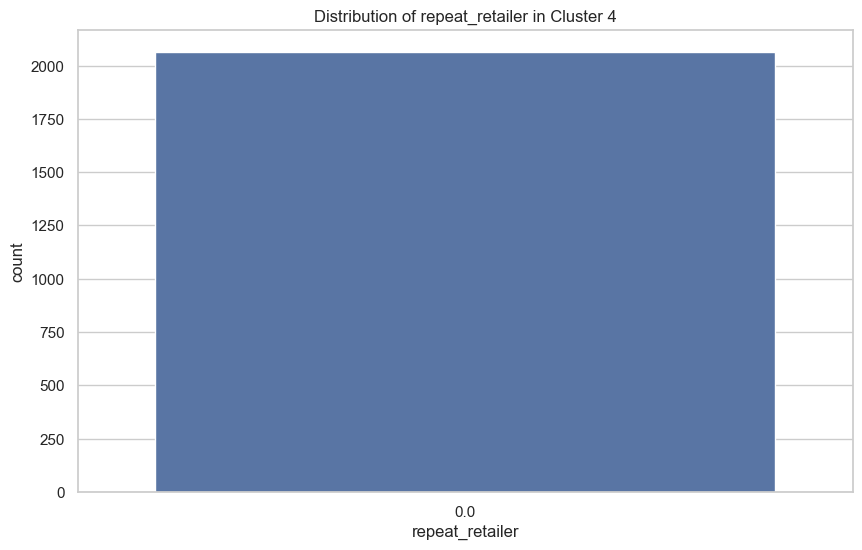

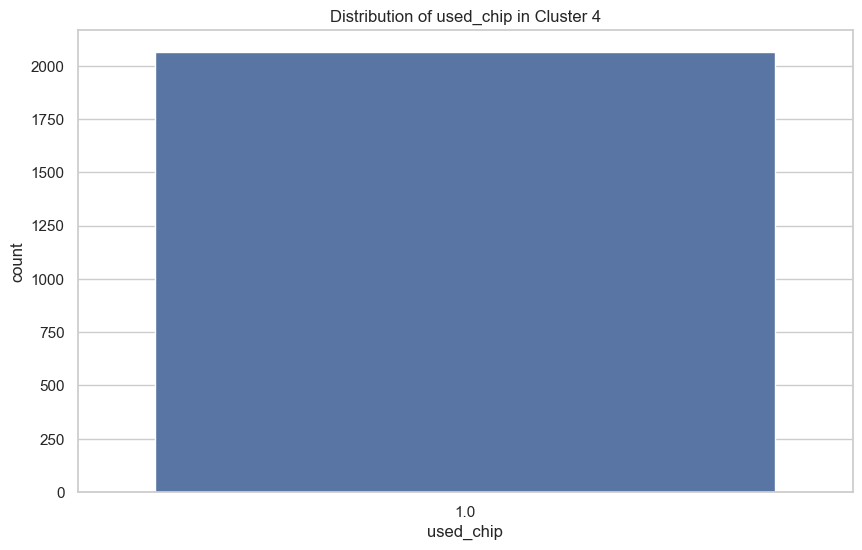

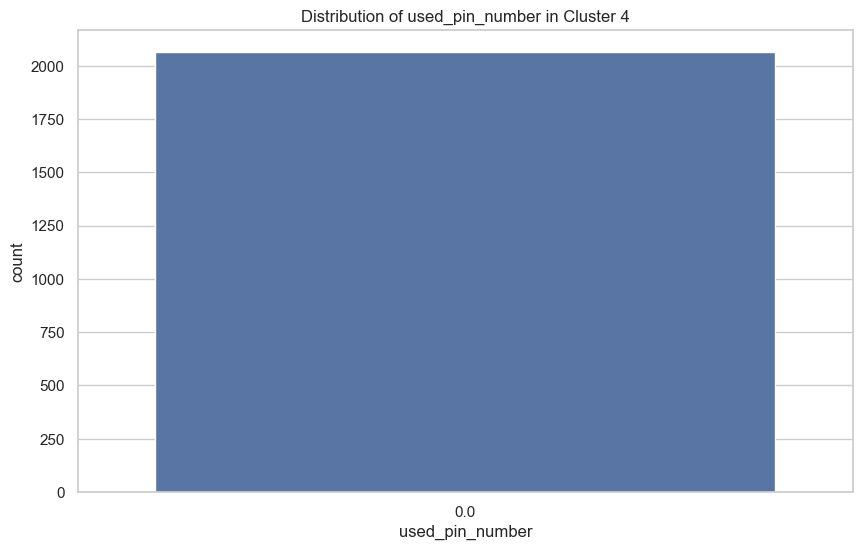

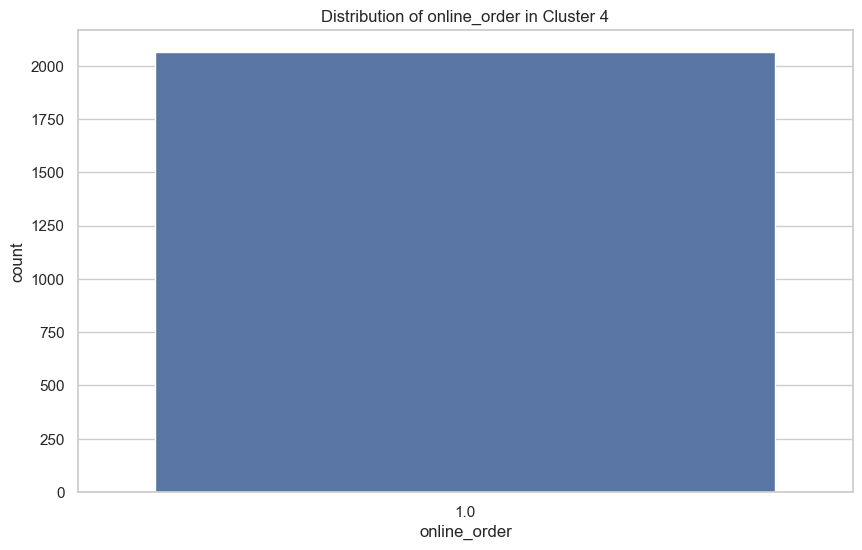

Cluster 5 Description:
       distance_from_home  distance_from_last_transaction  \
count         2646.000000                     2646.000000   
mean             0.142664                        0.158126   
std              0.256593                        0.207989   
min              0.000000                        0.000052   
25%              0.003212                        0.023086   
50%              0.005380                        0.070379   
75%              0.007539                        0.198687   
max              0.999933                        0.998186   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
count                     2646.000000      2646.000000     2646.0   
mean                         0.490510         0.238851        0.0   
std                          0.167350         0.426462        0.0   
min                          0.305186         0.000000        0.0   
25%                          0.358666         0.000000        0.0   
50%          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


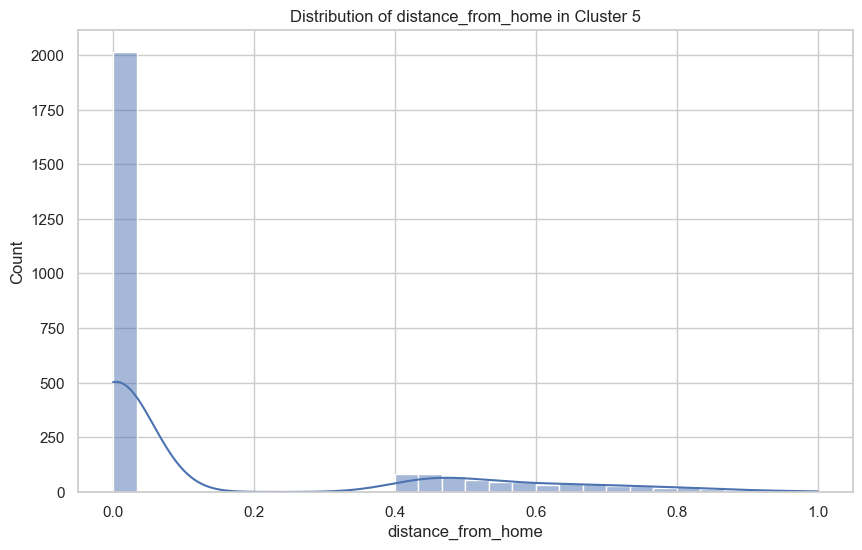

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


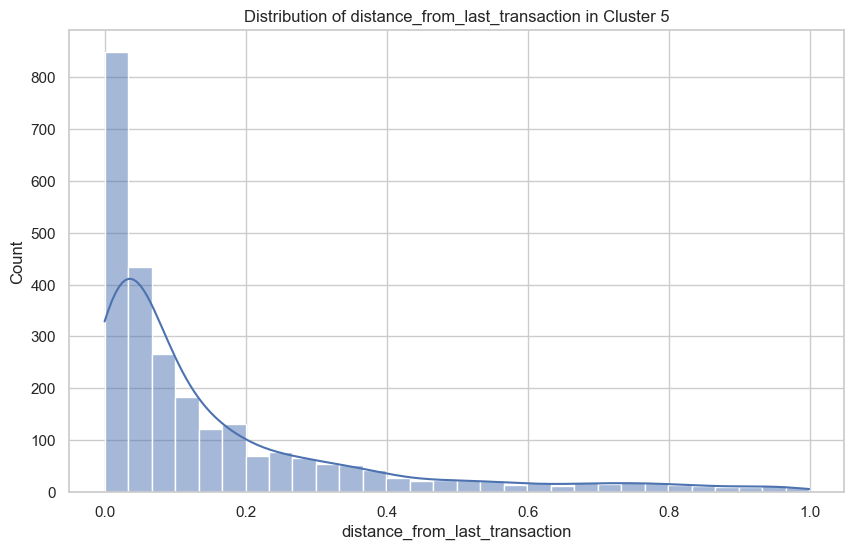

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


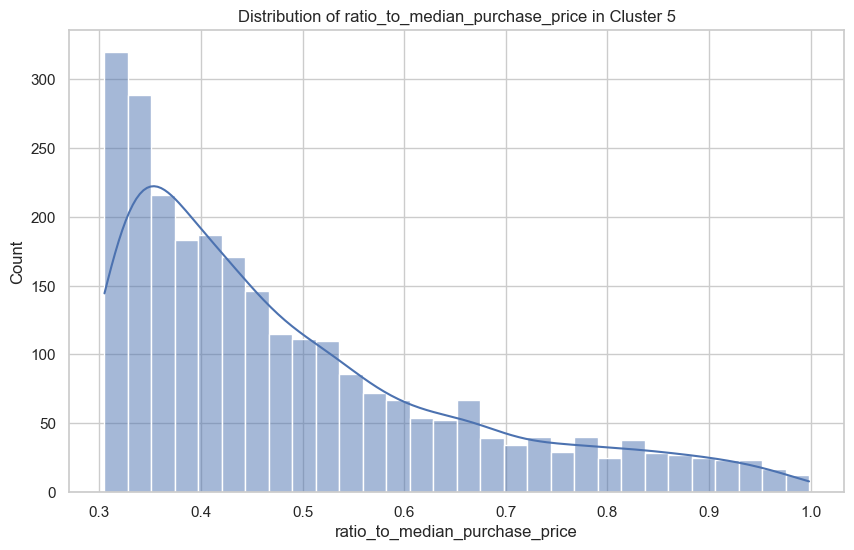

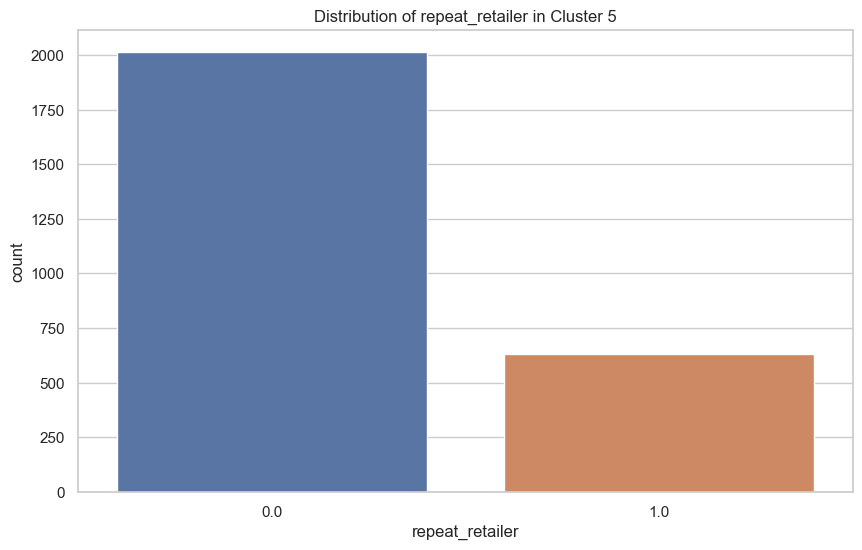

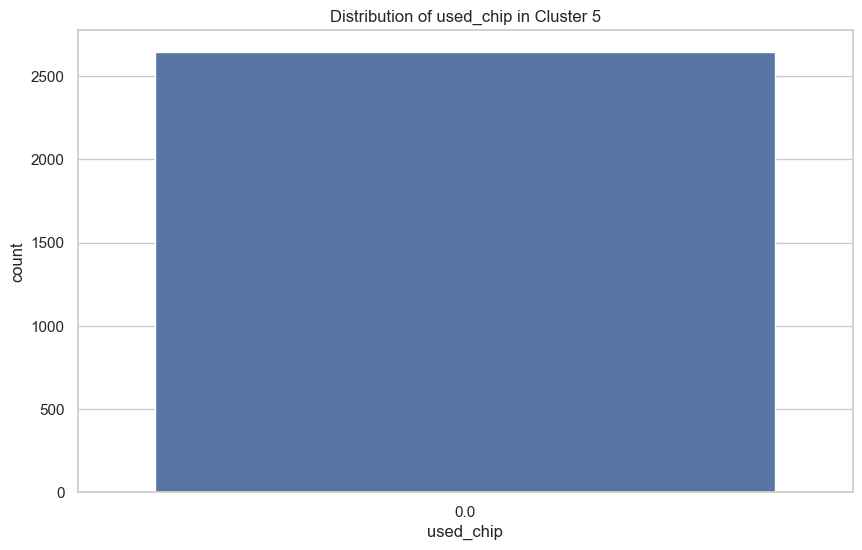

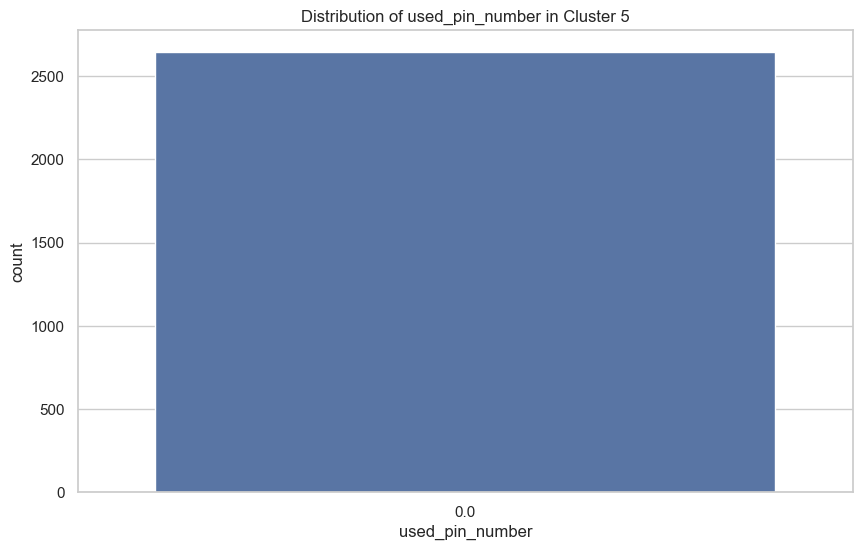

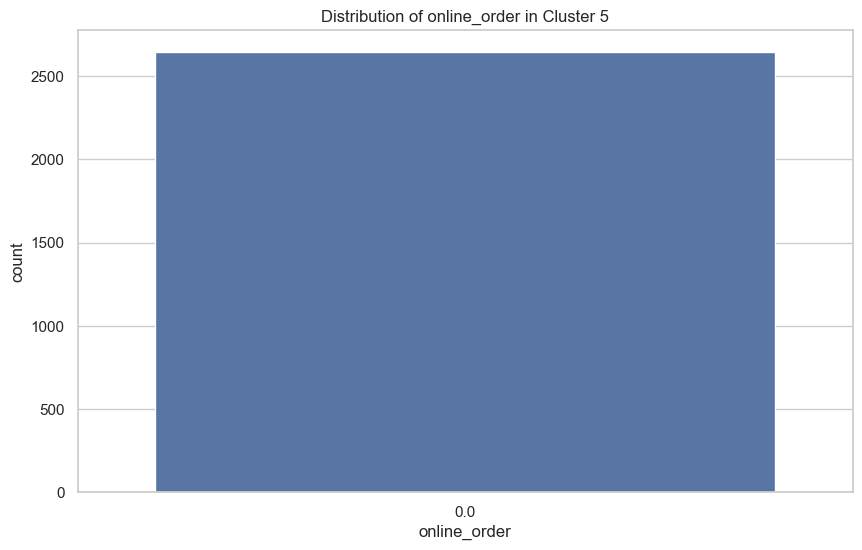

In [91]:
for cluster in range(num_clus):
    cluster_data = clustered_df[clustered_df['clus'] == cluster]
    print(f'Cluster {cluster} Description:')
    print(cluster_data.describe(include='all'))

    # Análise de recursos numéricos para o cluster
    for column in num_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(cluster_data[column], bins=30, kde=True)
        plt.title(f'Distribution of {column} in Cluster {cluster}')
        plt.show()
    
    # Análise de recursos categóricos para o cluster
    for column in category_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=cluster_data)
        plt.title(f'Distribution of {column} in Cluster {cluster}')
        plt.show()

pca - reduzir dimensionalidade  \/ mapa de calor com classes